#### In my earlier notebook, I received an accuracy of about 99.30% using some pretrained models. In this notebook, I have attempted to create a basic weighted sum using those pretrained models ensemble to see if the accuracy could be increased a bit further.....

## Imports

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import time
from tqdm import tqdm
import torchvision.models as models
from collections import OrderedDict

## Load the Dataset

In [17]:
# Define transforms
transform = transforms.Compose([transforms.Resize((224, 224)),  # Resize to 224x224
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                               ])


# Create training set and define training dataloader and validation dataloader
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

indices_list = list(range(len(train_data)))
np.random.shuffle(indices_list)
split_index = int(0.9 * len(indices_list))
train_index = indices_list[: split_index]
valid_index = indices_list[split_index: ]

train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=128, sampler=valid_sampler)




# Create test set and define test dataloader
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle = True)

## Train Function

In [18]:
def funct_criterion():
    criterion = nn.NLLLoss()
    return criterion


def funct_optimizer(my_model, alpha = 0.001):
    optimizer = optim.Adam(my_model.parameters(), alpha)
    return optimizer



def check_accuracy(model, dataloaders):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloaders:
            images, labels = data[0].to('cuda'), data[1].to('cuda')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct/total

In [19]:
def train_function(model, dataloaders_train, dataloaders_validate):
    
    print("TRAINING STARTED!!!!")
    start = time.time()
    
    
    train_loss = []
    train_acc = []
    validate_acc = []
    epoch = []

    for count in range(num_of_iterations):
    
        print("================================================================")
        print("Iteration --> {}/{} ".format(count+1, num_of_iterations), end = '\n')
        print("================================================================")
        
        running_loss = 0.0
        steps = 0
        
        for i, data in tqdm(enumerate(dataloaders_train), total=len(dataloaders_train)):
        
            steps += 1
            
            inputs, labels = data
            print(inputs.shape)
            inputs = inputs.to('cuda')
            labels = labels.to('cuda')
            optimizer.zero_grad()
        
            #Feeding forward
            outputs = model.forward(inputs)
            loss = criterion(outputs, labels)
            #Back-propagation
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
            tqdm._instances.clear()
            
        
        epoch.append(count+1)
        train_acc.append(round(check_accuracy(model, dataloaders_train), 4))
        validate_acc.append(round(check_accuracy(model, dataloaders_validate), 4))
        train_loss.append(running_loss/steps)
        print("Training loss: ", running_loss/steps)
        print("Training Accuracy: ", train_acc[-1])
        print("Validation Accuracy: ", validate_acc[-1])
        torch.cuda.empty_cache()


    print("TRAINING OVER!!!!")
    end = time.time()
    print("Training Time: ", (end - start)/60, " minutes")
    
    
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(5)
    plt.plot(epoch, train_acc, label = "Training Accuracy")
    plt.plot(epoch, validate_acc, label = "Validation Accuracy")
    plt.plot(epoch, train_loss, label = "Training Loss")
    plt.legend()
    plt.show()

## Pretrained ResNet18

TRAINING STARTED!!!!
Iteration --> 1/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:00<05:53,  1.19it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<04:06,  1.70it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:01<03:34,  1.95it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<03:24,  2.05it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:02<03:12,  2.16it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:02<03:07,  2.21it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:03<03:05,  2.24it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:03<03:01,  2.28it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:04<02:59,  2.30it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:04<02:58,  2.31it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:05<02:58,  2.30it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:05<02:59,  2.28it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:06<02:58,  2.29it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:06<02:57,  2.30it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:06<02:55,  2.32it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:07<02:55,  2.32it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:07<02:53,  2.33it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:08<02:51,  2.35it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:08<02:50,  2.36it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:08<02:48,  2.38it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:09<02:48,  2.37it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:09<02:47,  2.39it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:10<02:47,  2.38it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:10<02:48,  2.36it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:11<02:50,  2.32it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:11<02:51,  2.30it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:11<02:51,  2.31it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:12<02:51,  2.30it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:12<02:48,  2.34it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:13<02:45,  2.36it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:13<02:44,  2.38it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:14<02:45,  2.35it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:14<02:45,  2.35it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:14<02:45,  2.34it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:15<02:44,  2.35it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:15<02:44,  2.35it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:16<02:48,  2.29it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:16<02:46,  2.31it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:17<02:44,  2.32it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:17<02:44,  2.33it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:17<02:42,  2.34it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:18<02:42,  2.34it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:18<02:43,  2.32it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:19<02:44,  2.30it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:19<02:42,  2.31it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:20<02:40,  2.35it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:20<02:43,  2.29it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:21<02:43,  2.29it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:21<02:42,  2.29it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:21<02:48,  2.21it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:22<02:51,  2.16it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:22<02:55,  2.11it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:23<02:54,  2.12it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:23<02:55,  2.09it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:24<02:54,  2.10it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:24<02:51,  2.13it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:25<02:52,  2.12it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:25<02:48,  2.16it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:26<02:48,  2.15it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:26<02:47,  2.16it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:27<02:44,  2.19it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:27<02:43,  2.20it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:28<02:45,  2.17it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:28<02:44,  2.18it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:28<02:44,  2.17it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:29<02:43,  2.17it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:29<02:46,  2.13it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:30<02:49,  2.08it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:30<02:47,  2.10it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:31<02:43,  2.16it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:31<02:44,  2.14it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:32<02:44,  2.12it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:32<02:42,  2.15it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:33<02:42,  2.14it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:33<02:42,  2.14it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:34<02:39,  2.17it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:34<02:36,  2.20it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:34<02:35,  2.21it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:35<02:37,  2.18it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:35<02:35,  2.20it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:36<02:36,  2.18it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:36<02:34,  2.19it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:37<02:32,  2.23it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:37<02:32,  2.22it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:38<02:33,  2.19it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:38<02:30,  2.23it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:39<02:29,  2.25it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:39<02:27,  2.26it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:39<02:27,  2.26it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:40<02:29,  2.23it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:40<02:31,  2.18it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:41<02:33,  2.15it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:41<02:31,  2.17it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:42<02:31,  2.17it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:42<02:34,  2.11it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:43<02:30,  2.16it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:43<02:28,  2.18it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:44<02:27,  2.19it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:44<02:27,  2.19it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:44<02:25,  2.21it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:45<02:23,  2.24it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:45<02:22,  2.24it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:46<02:21,  2.25it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:46<02:18,  2.30it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [00:47<02:17,  2.31it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [00:47<02:15,  2.33it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [00:48<02:18,  2.28it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [00:48<02:18,  2.26it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [00:48<02:19,  2.24it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [00:49<02:18,  2.26it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [00:49<02:17,  2.25it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [00:50<02:21,  2.19it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [00:50<02:29,  2.07it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [00:51<03:26,  1.49it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [00:52<03:18,  1.55it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [00:52<02:59,  1.71it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [00:53<02:49,  1.80it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [00:53<02:39,  1.90it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [00:54<02:39,  1.90it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [00:54<02:36,  1.92it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [00:55<02:31,  1.98it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [00:55<02:27,  2.03it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [00:56<02:25,  2.06it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [00:56<02:19,  2.14it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [00:57<02:19,  2.13it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [00:57<02:17,  2.15it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [00:58<02:15,  2.17it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [00:58<02:15,  2.17it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [00:59<02:17,  2.13it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [00:59<02:16,  2.13it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:00<02:19,  2.08it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:00<02:18,  2.09it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:01<02:21,  2.04it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:01<02:21,  2.04it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:02<02:23,  2.01it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:02<02:22,  2.01it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:03<02:23,  1.99it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:03<02:22,  2.00it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:04<02:20,  2.02it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:04<02:17,  2.05it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:05<02:14,  2.09it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:05<02:12,  2.12it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:05<02:12,  2.11it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:06<02:09,  2.15it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:06<02:07,  2.17it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:07<02:06,  2.18it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:07<02:05,  2.19it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:08<02:03,  2.22it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:08<02:04,  2.19it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:09<02:03,  2.20it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:09<02:03,  2.19it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:09<02:00,  2.24it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:10<01:58,  2.27it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:10<01:57,  2.28it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:11<01:57,  2.28it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:11<01:56,  2.29it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:12<01:56,  2.27it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:12<01:57,  2.24it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:13<01:56,  2.25it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:13<01:55,  2.27it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:13<01:57,  2.23it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:14<01:57,  2.21it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:14<01:56,  2.22it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:15<01:57,  2.20it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:15<01:58,  2.16it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:16<01:59,  2.14it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:16<01:58,  2.16it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:17<02:00,  2.11it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:17<02:02,  2.07it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:18<02:00,  2.09it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:18<02:00,  2.09it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:19<01:58,  2.11it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:19<01:59,  2.08it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:20<01:58,  2.09it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:20<01:59,  2.07it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:21<01:57,  2.09it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:21<01:59,  2.06it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:22<01:57,  2.07it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:22<01:55,  2.11it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:23<01:54,  2.11it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:23<01:52,  2.14it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:23<01:50,  2.17it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:24<01:49,  2.18it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:24<01:48,  2.20it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:25<01:47,  2.21it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:25<01:47,  2.20it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:26<01:47,  2.18it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:26<01:45,  2.21it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:27<01:44,  2.24it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:27<01:43,  2.25it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:27<01:45,  2.20it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:28<01:43,  2.22it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:28<01:45,  2.17it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:29<01:45,  2.15it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:29<01:45,  2.15it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:30<01:44,  2.17it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:30<01:44,  2.15it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:31<01:42,  2.18it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:31<01:41,  2.20it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:32<01:39,  2.23it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:32<01:39,  2.22it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:32<01:37,  2.26it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:33<01:36,  2.27it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:33<01:35,  2.29it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:34<01:35,  2.28it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:34<01:36,  2.25it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:35<01:36,  2.22it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:35<01:39,  2.16it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:36<01:38,  2.15it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:36<01:41,  2.08it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [01:37<01:40,  2.10it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [01:37<01:39,  2.11it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [01:38<01:39,  2.11it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [01:38<01:40,  2.06it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [01:39<01:37,  2.11it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [01:39<01:40,  2.06it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [01:40<01:38,  2.08it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [01:40<01:38,  2.08it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [01:40<01:38,  2.06it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [01:41<01:36,  2.09it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [01:41<01:35,  2.11it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [01:42<01:32,  2.17it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [01:42<01:31,  2.18it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [01:43<01:30,  2.20it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [01:43<01:31,  2.16it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [01:44<01:31,  2.15it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [01:44<01:31,  2.13it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [01:45<01:30,  2.15it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [01:45<01:28,  2.18it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [01:46<01:27,  2.20it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [01:46<01:27,  2.18it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [01:46<01:27,  2.17it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [01:47<01:26,  2.18it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [01:47<01:26,  2.18it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [01:48<01:25,  2.18it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [01:48<01:23,  2.22it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [01:49<01:22,  2.23it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [01:49<01:21,  2.25it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [01:50<01:21,  2.24it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [01:50<01:22,  2.22it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [01:51<01:21,  2.22it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [01:51<01:20,  2.25it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [01:51<01:20,  2.23it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [01:52<01:20,  2.20it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [01:52<01:22,  2.16it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [01:53<01:22,  2.13it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [01:53<01:21,  2.14it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [01:54<01:19,  2.18it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [01:54<01:19,  2.19it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [01:55<01:20,  2.15it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [01:55<01:20,  2.14it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [01:56<01:20,  2.10it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [01:56<01:19,  2.11it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [01:57<01:17,  2.16it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [01:57<01:17,  2.16it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [01:57<01:16,  2.16it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [01:58<01:19,  2.07it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [01:58<01:17,  2.11it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [01:59<01:21,  2.01it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [01:59<01:20,  2.02it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:00<01:19,  2.04it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:00<01:16,  2.10it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:01<01:14,  2.13it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:01<01:13,  2.16it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:02<01:12,  2.18it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:02<01:10,  2.21it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:03<01:11,  2.18it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:03<01:10,  2.18it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:04<01:09,  2.19it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:04<01:10,  2.15it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:05<01:12,  2.09it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:05<01:13,  2.03it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:06<01:13,  2.03it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:06<01:13,  2.01it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:07<01:12,  2.01it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:07<01:12,  2.02it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:08<01:12,  2.00it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:08<01:09,  2.06it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:09<01:10,  2.03it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:09<01:11,  1.99it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:10<01:12,  1.96it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:10<01:11,  1.95it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:11<01:12,  1.91it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:11<01:12,  1.90it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:12<01:11,  1.93it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:12<01:12,  1.89it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:13<01:11,  1.89it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:13<01:09,  1.93it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:14<01:07,  1.98it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:14<01:06,  1.98it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:15<01:05,  2.00it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:15<01:05,  1.98it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:16<01:04,  1.99it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:16<01:03,  2.01it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:17<01:04,  1.96it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:17<01:02,  2.00it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:18<01:01,  2.02it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:18<01:01,  2.03it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:19<01:00,  2.05it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:19<00:58,  2.08it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:20<00:58,  2.08it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:20<00:56,  2.13it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:21<00:55,  2.14it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:21<00:54,  2.15it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:22<00:55,  2.13it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:22<00:54,  2.13it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:22<00:54,  2.11it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:23<00:55,  2.06it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:23<00:55,  2.05it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:24<00:55,  2.02it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:25<00:56,  1.97it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [02:25<00:55,  2.00it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [02:26<00:54,  1.98it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [02:26<00:52,  2.04it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [02:26<00:52,  2.06it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [02:27<00:51,  2.07it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [02:27<00:50,  2.09it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [02:28<00:50,  2.07it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [02:28<00:51,  2.01it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [02:29<00:49,  2.05it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [02:29<00:49,  2.04it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [02:30<00:49,  2.02it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [02:30<00:48,  2.02it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [02:31<00:49,  2.00it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [02:31<00:47,  2.03it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [02:32<00:47,  2.02it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [02:32<00:47,  2.01it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [02:33<00:46,  2.03it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [02:33<00:45,  2.04it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [02:34<00:43,  2.10it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [02:34<00:43,  2.11it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [02:35<00:43,  2.09it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [02:35<00:43,  2.07it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [02:36<00:43,  2.04it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [02:36<00:41,  2.09it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [02:37<00:40,  2.12it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [02:37<00:44,  1.91it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [02:38<00:44,  1.90it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [02:38<00:43,  1.89it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [02:39<00:43,  1.90it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [02:39<00:42,  1.91it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [02:40<00:43,  1.82it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [02:41<00:43,  1.82it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [02:41<00:42,  1.85it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [02:42<00:40,  1.89it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [02:42<00:40,  1.88it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [02:43<00:40,  1.86it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [02:43<00:40,  1.83it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [02:44<00:39,  1.84it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [02:44<00:39,  1.84it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [02:45<00:38,  1.84it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [02:45<00:37,  1.86it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [02:46<00:36,  1.87it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [02:46<00:36,  1.87it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [02:47<00:36,  1.83it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [02:48<00:36,  1.82it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [02:48<00:35,  1.82it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [02:49<00:34,  1.86it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [02:49<00:34,  1.83it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [02:50<00:34,  1.79it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [02:50<00:33,  1.80it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [02:51<00:32,  1.85it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [02:51<00:32,  1.83it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [02:52<00:30,  1.88it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [02:52<00:29,  1.90it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [02:53<00:28,  1.96it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [02:53<00:27,  1.99it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [02:54<00:27,  1.94it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [02:54<00:28,  1.89it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [02:55<00:27,  1.89it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [02:56<00:26,  1.92it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [02:56<00:25,  1.96it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [02:56<00:24,  1.98it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [02:57<00:23,  2.00it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [02:57<00:23,  2.00it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [02:58<00:22,  2.03it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [02:58<00:22,  2.03it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [02:59<00:21,  2.04it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [02:59<00:21,  2.02it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:00<00:20,  2.00it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:00<00:20,  1.98it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:01<00:20,  1.97it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:02<00:20,  1.94it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:02<00:19,  1.97it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:03<00:18,  1.95it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:03<00:18,  1.97it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:04<00:17,  1.99it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:04<00:16,  2.04it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:04<00:16,  2.06it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:05<00:15,  2.12it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:05<00:15,  2.06it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:06<00:14,  2.08it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:06<00:13,  2.07it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:07<00:13,  2.03it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:07<00:13,  2.06it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:08<00:12,  2.08it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:08<00:12,  2.04it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:09<00:11,  2.04it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:09<00:11,  2.08it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:10<00:10,  2.07it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:10<00:10,  2.06it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:11<00:09,  2.07it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:11<00:09,  2.09it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:12<00:08,  2.12it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:12<00:08,  2.11it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:13<00:07,  2.08it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:13<00:07,  2.09it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:14<00:06,  2.11it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:14<00:06,  2.13it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:15<00:05,  2.11it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:15<00:05,  2.07it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:16<00:04,  2.04it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:16<00:04,  2.02it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [03:16<00:03,  2.05it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [03:17<00:03,  2.04it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [03:17<00:02,  2.08it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [03:18<00:02,  2.04it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [03:18<00:01,  2.03it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [03:19<00:01,  1.97it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [03:19<00:01,  1.99it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [03:20<00:00,  1.95it/s]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [03:21<00:00,  2.10it/s]


Training loss:  0.1002899457687309
Training Accuracy:  0.9901
Validation Accuracy:  0.985
Iteration --> 2/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:00<06:40,  1.05it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<04:50,  1.44it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:01<04:03,  1.72it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<03:49,  1.82it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:02<03:39,  1.90it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:03<03:31,  1.96it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:03<03:24,  2.03it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:04<03:20,  2.06it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:04<03:25,  2.01it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:05<03:25,  2.01it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:05<03:27,  1.98it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:06<03:30,  1.94it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:06<03:32,  1.93it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:07<03:30,  1.94it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:07<03:24,  1.99it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:08<03:19,  2.04it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:08<03:17,  2.05it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:09<03:16,  2.05it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:09<03:20,  2.01it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:10<03:14,  2.06it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:10<03:15,  2.05it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:11<03:13,  2.07it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:11<03:15,  2.04it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:12<03:19,  2.00it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:12<03:16,  2.02it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:13<03:14,  2.04it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:13<03:15,  2.02it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:14<03:17,  2.00it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:14<03:18,  1.98it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:15<03:14,  2.01it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:15<03:12,  2.03it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:16<03:09,  2.05it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:16<03:07,  2.08it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:17<03:08,  2.05it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:17<03:07,  2.06it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:18<03:06,  2.07it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:18<03:05,  2.08it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:19<03:05,  2.07it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:19<03:05,  2.06it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:20<03:06,  2.05it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:20<03:09,  2.01it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:21<03:06,  2.03it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:21<03:12,  1.97it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:22<03:11,  1.98it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:22<03:14,  1.94it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:23<03:19,  1.88it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:23<03:16,  1.91it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:24<03:14,  1.93it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:24<03:11,  1.94it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:25<03:11,  1.94it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:25<03:11,  1.93it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:26<03:14,  1.90it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:26<03:22,  1.82it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:27<03:22,  1.82it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:28<03:36,  1.70it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:28<03:41,  1.65it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:29<03:42,  1.64it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:29<03:33,  1.70it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:30<03:38,  1.66it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:31<03:28,  1.73it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:31<03:28,  1.73it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:32<03:22,  1.78it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:32<03:25,  1.75it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:33<03:20,  1.78it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:33<03:19,  1.79it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:34<03:21,  1.77it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:35<03:22,  1.75it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:35<03:19,  1.78it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:36<03:20,  1.76it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:36<03:11,  1.84it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:37<03:14,  1.81it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:37<03:12,  1.82it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:38<03:04,  1.89it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:38<02:59,  1.93it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:39<03:03,  1.89it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:39<03:00,  1.91it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:40<02:59,  1.93it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:40<02:59,  1.92it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:41<03:04,  1.86it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:42<03:03,  1.86it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:42<03:01,  1.88it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:43<02:56,  1.92it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:43<03:00,  1.87it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:44<03:01,  1.86it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:44<02:57,  1.90it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:45<02:54,  1.92it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:45<02:53,  1.93it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:46<02:47,  2.00it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:46<02:48,  1.98it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:47<02:53,  1.91it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:47<02:52,  1.92it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:48<02:52,  1.91it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:48<02:51,  1.91it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:49<02:50,  1.92it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:49<02:49,  1.93it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:50<02:48,  1.94it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:50<02:45,  1.96it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:51<02:45,  1.95it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:51<02:45,  1.95it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:52<02:45,  1.94it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:52<02:44,  1.95it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:53<02:48,  1.89it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:53<02:50,  1.87it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:54<02:49,  1.88it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [00:55<02:53,  1.83it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [00:55<02:53,  1.82it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [00:56<02:51,  1.84it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [00:56<02:47,  1.87it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [00:57<02:55,  1.79it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [00:57<03:05,  1.68it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [00:58<03:07,  1.66it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [00:59<03:05,  1.67it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [00:59<03:03,  1.69it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [01:00<03:02,  1.68it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [01:00<03:04,  1.66it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [01:01<03:04,  1.66it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [01:02<03:05,  1.65it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [01:02<03:02,  1.67it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [01:03<03:02,  1.66it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [01:03<02:54,  1.73it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [01:04<02:54,  1.72it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [01:05<02:49,  1.77it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [01:05<02:46,  1.80it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [01:06<02:46,  1.79it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [01:06<02:49,  1.75it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [01:07<02:41,  1.83it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [01:07<02:38,  1.86it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [01:08<02:42,  1.80it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [01:08<02:42,  1.80it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [01:09<02:40,  1.82it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:09<02:40,  1.82it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:10<02:36,  1.85it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:11<02:35,  1.86it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:11<02:29,  1.92it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:11<02:27,  1.94it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:12<02:27,  1.93it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:13<02:26,  1.95it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:13<02:26,  1.94it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:14<02:31,  1.87it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:14<02:33,  1.84it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:15<02:36,  1.79it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:15<02:33,  1.82it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:16<02:33,  1.81it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:16<02:32,  1.82it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:17<02:30,  1.83it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:18<02:32,  1.81it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:18<02:33,  1.79it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:19<02:28,  1.85it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:19<02:26,  1.87it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:20<02:28,  1.83it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:20<02:27,  1.84it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:21<02:28,  1.82it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:21<02:26,  1.84it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:22<02:24,  1.86it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:22<02:22,  1.88it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:23<02:20,  1.90it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:23<02:23,  1.85it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:24<02:21,  1.86it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:25<02:21,  1.86it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:25<02:20,  1.86it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:26<02:26,  1.78it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:26<02:31,  1.72it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:27<02:23,  1.80it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:27<02:17,  1.87it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:28<02:15,  1.89it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:28<02:15,  1.89it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:29<02:20,  1.82it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:30<02:27,  1.72it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:30<02:42,  1.56it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:31<02:37,  1.60it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:31<02:29,  1.68it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:32<02:28,  1.68it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:33<02:30,  1.65it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:33<02:30,  1.65it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:34<02:30,  1.64it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:34<02:26,  1.68it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:35<02:25,  1.69it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:36<02:25,  1.68it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:36<02:18,  1.75it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:37<02:15,  1.79it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:37<02:17,  1.76it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:38<02:14,  1.78it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:38<02:13,  1.79it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:39<02:14,  1.77it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:40<02:15,  1.75it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:40<02:11,  1.79it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:41<02:12,  1.77it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:41<02:12,  1.77it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:42<02:16,  1.71it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:43<02:19,  1.67it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:43<02:19,  1.65it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:44<02:17,  1.68it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:44<02:16,  1.68it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:45<02:08,  1.77it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:45<02:06,  1.79it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:46<02:00,  1.87it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:46<01:59,  1.89it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:47<01:57,  1.90it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:47<01:59,  1.87it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:48<01:58,  1.87it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:48<01:57,  1.89it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:49<01:56,  1.88it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:49<01:55,  1.90it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:50<01:55,  1.89it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:51<01:52,  1.92it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:51<01:51,  1.94it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:52<01:49,  1.96it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:52<01:50,  1.95it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:53<01:48,  1.96it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:53<01:49,  1.94it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [01:54<01:47,  1.96it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [01:54<01:46,  1.97it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [01:55<01:47,  1.95it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [01:55<01:52,  1.85it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [01:56<02:07,  1.62it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [01:57<02:08,  1.60it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [01:57<02:02,  1.67it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [01:58<01:55,  1.76it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [01:58<01:56,  1.75it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [01:59<01:53,  1.78it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [01:59<02:00,  1.67it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [02:00<01:58,  1.69it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [02:01<02:00,  1.65it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [02:01<01:59,  1.65it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [02:02<01:58,  1.66it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [02:02<01:51,  1.76it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [02:03<01:48,  1.80it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [02:03<01:43,  1.87it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [02:04<01:48,  1.77it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [02:05<01:49,  1.75it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [02:05<01:47,  1.77it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [02:06<01:50,  1.71it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [02:06<01:51,  1.70it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [02:07<01:54,  1.64it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [02:08<01:53,  1.64it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [02:08<01:51,  1.66it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [02:09<01:50,  1.68it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [02:09<01:47,  1.72it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [02:10<01:45,  1.73it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [02:10<01:42,  1.78it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [02:11<01:38,  1.84it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [02:12<01:36,  1.86it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [02:12<01:38,  1.81it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [02:13<01:37,  1.83it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [02:13<01:37,  1.81it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [02:14<01:38,  1.78it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [02:14<01:38,  1.78it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [02:15<01:37,  1.79it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [02:16<01:40,  1.72it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [02:16<01:40,  1.71it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [02:17<01:53,  1.51it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [02:18<01:48,  1.57it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [02:18<01:47,  1.57it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [02:19<01:47,  1.57it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [02:19<01:43,  1.62it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [02:20<01:41,  1.63it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [02:21<01:42,  1.61it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [02:21<01:41,  1.62it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [02:22<01:41,  1.61it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [02:23<01:43,  1.57it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:23<01:44,  1.53it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:24<01:40,  1.60it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:24<01:34,  1.68it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:25<01:33,  1.70it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:25<01:30,  1.73it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:26<01:29,  1.73it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:27<01:27,  1.77it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:27<01:27,  1.76it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:28<01:29,  1.70it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:28<01:31,  1.66it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:29<01:32,  1.64it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:30<01:30,  1.66it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:30<01:37,  1.52it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:31<01:38,  1.50it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:32<01:34,  1.55it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:32<01:31,  1.60it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:33<01:29,  1.62it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:34<01:30,  1.58it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:34<01:31,  1.56it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:35<01:28,  1.61it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:35<01:26,  1.64it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:36<01:22,  1.69it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:36<01:21,  1.70it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:37<01:20,  1.72it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:38<01:19,  1.72it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:38<01:18,  1.72it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:39<01:22,  1.64it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:39<01:20,  1.67it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:40<01:18,  1.70it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:41<01:17,  1.70it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:41<01:14,  1.75it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:42<01:15,  1.72it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:42<01:16,  1.69it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:43<01:15,  1.70it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:44<01:14,  1.71it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:44<01:15,  1.68it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:45<01:13,  1.69it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:45<01:13,  1.68it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:46<01:13,  1.68it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:46<01:09,  1.74it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:47<01:07,  1.78it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:48<01:09,  1.73it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:48<01:09,  1.72it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:49<01:05,  1.80it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:49<01:04,  1.81it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:50<01:04,  1.79it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:50<01:03,  1.82it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:51<01:01,  1.86it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:51<00:59,  1.90it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:52<00:58,  1.92it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:52<00:58,  1.89it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [02:53<00:59,  1.84it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [02:54<01:02,  1.76it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [02:54<01:02,  1.74it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [02:55<01:01,  1.74it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [02:55<01:01,  1.73it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [02:56<01:01,  1.70it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [02:57<01:00,  1.71it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [02:57<00:59,  1.73it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [02:58<00:57,  1.76it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [02:58<00:57,  1.75it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [02:59<00:58,  1.72it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [02:59<00:55,  1.78it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [03:00<00:54,  1.79it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [03:00<00:54,  1.79it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [03:01<00:55,  1.74it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [03:02<00:52,  1.80it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [03:02<00:52,  1.81it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [03:03<00:51,  1.80it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [03:03<00:50,  1.81it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [03:04<00:52,  1.73it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [03:04<00:52,  1.71it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [03:05<00:57,  1.56it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [03:06<00:55,  1.59it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [03:06<00:53,  1.61it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [03:07<00:54,  1.58it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [03:08<01:00,  1.41it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [03:09<00:57,  1.46it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [03:09<00:54,  1.54it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [03:10<00:51,  1.60it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [03:10<00:50,  1.62it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [03:11<00:48,  1.63it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [03:12<00:47,  1.65it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [03:12<00:46,  1.66it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [03:13<00:44,  1.74it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [03:13<00:43,  1.74it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [03:14<00:43,  1.72it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [03:14<00:43,  1.72it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [03:15<00:42,  1.71it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [03:16<00:43,  1.65it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [03:16<00:43,  1.63it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [03:17<00:39,  1.76it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [03:17<00:39,  1.75it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [03:18<00:37,  1.80it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [03:18<00:36,  1.82it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [03:19<00:35,  1.86it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [03:20<00:36,  1.79it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [03:20<00:35,  1.78it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [03:21<00:35,  1.79it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [03:21<00:34,  1.79it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [03:22<00:32,  1.86it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [03:22<00:31,  1.89it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [03:23<00:30,  1.92it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [03:23<00:30,  1.90it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [03:24<00:30,  1.85it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [03:24<00:31,  1.80it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [03:25<00:30,  1.77it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [03:26<00:30,  1.79it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [03:26<00:30,  1.76it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [03:27<00:29,  1.74it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [03:27<00:28,  1.82it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [03:28<00:27,  1.83it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [03:28<00:26,  1.88it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [03:29<00:25,  1.91it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [03:29<00:24,  1.95it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [03:30<00:24,  1.90it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [03:30<00:23,  1.95it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [03:31<00:23,  1.88it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [03:31<00:24,  1.76it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:32<00:24,  1.73it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:33<00:24,  1.67it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:33<00:23,  1.69it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:34<00:23,  1.65it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:35<00:22,  1.66it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:35<00:22,  1.64it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:36<00:21,  1.65it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:36<00:20,  1.68it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:37<00:20,  1.69it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:38<00:19,  1.69it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:38<00:18,  1.74it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:39<00:17,  1.76it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:39<00:17,  1.71it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:40<00:17,  1.70it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:40<00:16,  1.71it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:41<00:15,  1.77it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:41<00:14,  1.82it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:42<00:13,  1.83it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:43<00:13,  1.84it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:43<00:12,  1.82it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:44<00:12,  1.83it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:44<00:11,  1.85it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:45<00:10,  1.83it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:45<00:10,  1.87it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:46<00:09,  1.84it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:46<00:09,  1.82it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:47<00:08,  1.83it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:47<00:08,  1.82it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:48<00:07,  1.80it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:48<00:07,  1.86it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:49<00:06,  1.90it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:50<00:05,  1.89it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:50<00:05,  1.90it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:51<00:04,  1.93it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [03:51<00:04,  1.94it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [03:52<00:03,  1.85it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [03:52<00:03,  1.84it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [03:53<00:02,  1.84it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [03:53<00:02,  1.82it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [03:54<00:01,  1.87it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [03:54<00:01,  1.91it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [03:55<00:00,  1.89it/s]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [03:55<00:00,  1.79it/s]


Training loss:  0.03920558495893942
Training Accuracy:  0.9915
Validation Accuracy:  0.988
Iteration --> 3/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:00<06:49,  1.03it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<04:56,  1.42it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:02<04:32,  1.54it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<04:19,  1.61it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:03<04:15,  1.63it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:03<04:10,  1.66it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:04<04:03,  1.71it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:04<04:00,  1.72it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:05<04:05,  1.68it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:06<04:09,  1.65it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:06<04:04,  1.68it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:07<03:57,  1.73it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:07<03:49,  1.78it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:08<03:46,  1.80it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:08<03:48,  1.78it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:09<03:39,  1.85it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:09<03:34,  1.89it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:10<03:34,  1.89it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:11<03:37,  1.85it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:11<03:33,  1.88it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:12<03:37,  1.84it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:12<03:36,  1.84it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:13<03:38,  1.83it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:13<03:35,  1.85it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:14<03:35,  1.84it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:14<03:40,  1.80it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:15<03:32,  1.86it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:15<03:30,  1.88it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:16<03:29,  1.88it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:16<03:30,  1.86it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:17<03:32,  1.84it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:18<03:33,  1.82it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:18<03:33,  1.82it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:19<03:33,  1.82it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:19<03:25,  1.89it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:20<03:18,  1.94it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:20<03:20,  1.92it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:21<03:21,  1.90it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:21<03:16,  1.95it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:22<03:26,  1.85it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:22<03:36,  1.76it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:23<03:41,  1.71it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:24<03:42,  1.70it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:24<03:43,  1.69it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:25<03:48,  1.65it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:26<03:50,  1.63it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:26<03:45,  1.66it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:27<03:40,  1.69it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:27<03:39,  1.70it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:28<03:34,  1.73it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:28<03:34,  1.73it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:29<03:37,  1.70it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:30<03:43,  1.65it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:30<03:44,  1.64it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:31<03:40,  1.66it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:31<03:43,  1.64it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:32<03:40,  1.65it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:33<03:38,  1.67it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:33<03:45,  1.61it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:34<03:39,  1.65it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:34<03:33,  1.69it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:35<03:21,  1.79it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:36<03:19,  1.80it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:36<03:22,  1.77it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:37<03:20,  1.78it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:37<03:16,  1.81it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:38<03:23,  1.75it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:38<03:21,  1.76it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:39<03:29,  1.69it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:40<03:38,  1.61it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:40<03:46,  1.55it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:41<03:43,  1.57it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:42<03:37,  1.60it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:42<03:41,  1.57it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:43<03:25,  1.69it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:43<03:20,  1.72it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:44<03:26,  1.67it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:45<03:29,  1.64it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:45<03:28,  1.64it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:46<03:26,  1.66it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:46<03:21,  1.70it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:47<03:21,  1.69it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:47<03:14,  1.74it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:48<03:09,  1.78it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:49<03:11,  1.76it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:49<03:04,  1.82it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:50<03:10,  1.76it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:50<03:13,  1.72it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:51<03:08,  1.77it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:51<03:01,  1.83it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:52<02:57,  1.86it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:52<02:57,  1.86it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:53<03:00,  1.82it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:54<03:04,  1.78it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:54<03:03,  1.78it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:55<03:01,  1.80it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:55<03:00,  1.80it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:56<02:59,  1.80it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:56<03:03,  1.76it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:57<02:57,  1.82it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:57<02:59,  1.79it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:58<03:06,  1.72it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:59<03:04,  1.72it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:59<02:54,  1.83it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [01:00<02:49,  1.87it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [01:00<02:47,  1.88it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [01:01<02:52,  1.83it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [01:01<02:52,  1.82it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [01:02<02:54,  1.79it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [01:03<03:02,  1.71it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [01:03<03:03,  1.70it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [01:04<02:55,  1.77it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [01:04<02:54,  1.78it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [01:05<02:57,  1.74it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [01:05<02:58,  1.72it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [01:06<03:00,  1.70it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [01:07<02:53,  1.75it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [01:07<02:54,  1.74it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [01:08<02:55,  1.72it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [01:08<03:01,  1.67it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [01:09<03:01,  1.65it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [01:10<02:59,  1.67it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [01:10<03:00,  1.65it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [01:11<03:04,  1.62it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [01:11<03:03,  1.62it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [01:12<02:59,  1.64it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [01:13<03:01,  1.63it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [01:13<02:59,  1.64it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [01:14<03:02,  1.61it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [01:14<02:58,  1.64it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:15<02:57,  1.64it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:16<02:54,  1.66it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:16<02:51,  1.68it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:17<02:42,  1.78it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:17<02:37,  1.82it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:18<02:33,  1.86it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:18<02:34,  1.84it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:19<02:38,  1.79it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:20<02:40,  1.77it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:20<02:47,  1.68it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:21<02:46,  1.69it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:21<02:47,  1.67it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:22<02:43,  1.71it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:22<02:39,  1.74it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:23<02:35,  1.78it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:24<02:30,  1.83it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:24<02:27,  1.87it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:25<02:24,  1.90it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:25<02:22,  1.92it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:26<02:20,  1.94it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:26<02:20,  1.93it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:27<02:20,  1.92it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:27<02:25,  1.85it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:28<02:30,  1.78it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:28<02:33,  1.74it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:29<02:35,  1.71it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:30<02:36,  1.70it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:30<02:34,  1.71it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:31<02:35,  1.70it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:31<02:27,  1.77it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:32<02:27,  1.77it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:32<02:23,  1.81it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:33<02:22,  1.82it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:33<02:23,  1.80it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:34<02:22,  1.81it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:35<02:20,  1.82it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:35<02:21,  1.80it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:36<02:19,  1.82it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:36<02:16,  1.86it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:37<02:13,  1.89it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:37<02:10,  1.93it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:38<02:10,  1.91it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:38<02:08,  1.93it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:39<02:10,  1.90it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:39<02:10,  1.89it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:40<02:15,  1.82it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:41<02:17,  1.79it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:41<02:18,  1.76it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:42<02:18,  1.76it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:42<02:24,  1.68it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:43<02:29,  1.61it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:44<02:24,  1.66it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:44<02:24,  1.66it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:45<02:25,  1.64it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:46<02:33,  1.55it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:46<02:32,  1.55it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:47<02:36,  1.50it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:47<02:30,  1.55it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:48<02:26,  1.59it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:49<02:24,  1.60it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:49<02:23,  1.61it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:50<02:16,  1.68it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:50<02:09,  1.77it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:51<02:04,  1.83it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:51<02:03,  1.83it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:52<02:04,  1.82it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:53<02:06,  1.78it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:53<02:00,  1.86it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:54<01:58,  1.89it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:54<01:56,  1.91it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:55<01:55,  1.91it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:55<01:53,  1.94it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:56<01:59,  1.84it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:56<02:01,  1.79it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:57<02:02,  1.77it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:57<01:57,  1.84it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:58<01:57,  1.83it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:58<01:56,  1.83it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:59<01:53,  1.87it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:59<01:50,  1.91it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [02:00<01:51,  1.89it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [02:01<01:53,  1.85it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [02:01<01:55,  1.81it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [02:02<01:54,  1.81it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [02:02<01:52,  1.83it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [02:03<01:52,  1.83it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [02:03<01:54,  1.80it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [02:04<01:52,  1.82it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [02:04<01:54,  1.77it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [02:05<01:56,  1.73it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [02:06<01:57,  1.71it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [02:06<02:01,  1.64it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [02:07<02:01,  1.64it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [02:08<02:38,  1.25it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [02:09<02:42,  1.21it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [02:10<02:30,  1.30it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [02:10<02:22,  1.37it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [02:11<02:15,  1.43it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [02:12<02:13,  1.45it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [02:12<02:08,  1.50it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [02:13<02:02,  1.56it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [02:13<02:00,  1.58it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [02:14<01:59,  1.58it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [02:15<01:57,  1.59it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [02:15<01:55,  1.62it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [02:16<01:54,  1.63it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [02:17<01:55,  1.60it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [02:17<01:55,  1.59it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [02:18<01:52,  1.63it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [02:18<01:49,  1.67it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [02:19<01:50,  1.64it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [02:20<01:49,  1.65it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [02:20<01:47,  1.67it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [02:21<01:50,  1.61it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [02:21<01:51,  1.59it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [02:22<01:48,  1.62it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [02:23<01:50,  1.59it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [02:23<01:54,  1.53it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [02:24<01:55,  1.50it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [02:25<01:52,  1.53it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [02:25<01:49,  1.56it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [02:26<01:45,  1.62it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [02:27<01:44,  1.61it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [02:27<01:40,  1.67it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [02:28<01:40,  1.66it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [02:28<01:46,  1.55it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [02:29<01:43,  1.59it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [02:30<01:41,  1.61it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [02:30<01:38,  1.65it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [02:31<01:37,  1.66it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:31<01:32,  1.74it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:32<01:32,  1.73it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:33<01:33,  1.70it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:33<01:35,  1.65it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:34<01:31,  1.71it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:34<01:26,  1.81it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:35<01:23,  1.86it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:35<01:21,  1.90it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:36<01:20,  1.90it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:36<01:20,  1.89it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:37<01:22,  1.83it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:37<01:23,  1.80it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:38<01:23,  1.79it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:39<01:23,  1.77it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:39<01:21,  1.80it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:40<01:22,  1.78it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:40<01:23,  1.74it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:41<01:24,  1.71it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:41<01:22,  1.73it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:42<01:18,  1.80it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:43<01:18,  1.80it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:43<01:19,  1.77it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:44<01:15,  1.84it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:44<01:12,  1.90it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:45<01:12,  1.89it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:45<01:15,  1.79it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:46<01:15,  1.80it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:46<01:12,  1.85it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:47<01:12,  1.85it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:47<01:11,  1.84it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:48<01:10,  1.86it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:48<01:08,  1.90it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:49<01:06,  1.94it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:49<01:07,  1.90it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:50<01:07,  1.89it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:51<01:08,  1.85it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:51<01:08,  1.81it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:52<01:09,  1.79it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:52<01:06,  1.85it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:53<01:05,  1.87it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:53<01:02,  1.93it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:54<01:01,  1.95it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:54<01:02,  1.92it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:55<01:02,  1.89it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:55<01:03,  1.86it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:56<01:01,  1.89it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:56<01:03,  1.82it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:57<01:03,  1.80it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:58<01:06,  1.71it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:58<01:07,  1.66it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:59<01:07,  1.63it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [03:00<01:07,  1.63it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [03:00<01:05,  1.67it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [03:01<01:04,  1.67it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [03:01<01:04,  1.67it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [03:02<01:12,  1.46it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [03:03<01:16,  1.38it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [03:04<01:10,  1.47it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [03:04<01:07,  1.54it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [03:05<01:04,  1.58it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [03:05<01:00,  1.67it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [03:06<00:57,  1.73it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [03:06<00:57,  1.73it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [03:07<00:57,  1.70it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [03:08<00:59,  1.64it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [03:08<00:57,  1.68it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [03:09<00:56,  1.67it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [03:09<00:55,  1.70it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [03:10<00:55,  1.68it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [03:11<00:53,  1.72it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [03:11<00:52,  1.75it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [03:12<00:52,  1.72it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [03:12<00:49,  1.79it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [03:13<00:49,  1.79it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [03:13<00:46,  1.86it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [03:14<00:45,  1.89it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [03:14<00:44,  1.91it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [03:15<00:44,  1.90it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [03:15<00:45,  1.83it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [03:16<00:43,  1.88it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [03:16<00:43,  1.88it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [03:17<00:41,  1.92it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [03:18<00:42,  1.84it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [03:18<00:43,  1.81it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [03:19<00:43,  1.75it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [03:19<00:43,  1.75it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [03:20<00:44,  1.69it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [03:20<00:41,  1.78it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [03:21<00:41,  1.74it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [03:22<00:41,  1.72it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [03:22<00:41,  1.72it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [03:23<00:41,  1.70it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [03:23<00:40,  1.72it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [03:24<00:38,  1.75it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [03:25<00:38,  1.73it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [03:25<00:37,  1.74it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [03:26<00:36,  1.77it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [03:26<00:35,  1.81it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [03:27<00:34,  1.81it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [03:27<00:34,  1.78it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [03:28<00:35,  1.73it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [03:29<00:36,  1.66it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [03:29<00:35,  1.66it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [03:30<00:35,  1.64it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [03:30<00:32,  1.76it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [03:31<00:30,  1.82it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [03:31<00:29,  1.88it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [03:32<00:28,  1.88it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [03:32<00:27,  1.93it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [03:33<00:27,  1.92it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [03:33<00:26,  1.93it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [03:34<00:25,  1.94it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [03:34<00:25,  1.95it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [03:35<00:25,  1.90it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [03:35<00:25,  1.87it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [03:36<00:24,  1.85it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [03:37<00:24,  1.82it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [03:37<00:25,  1.76it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [03:38<00:24,  1.72it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:38<00:24,  1.69it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:39<00:23,  1.72it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:39<00:22,  1.80it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:40<00:21,  1.84it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:41<00:20,  1.87it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:41<00:20,  1.85it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:42<00:19,  1.83it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:42<00:19,  1.81it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:43<00:19,  1.76it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:43<00:18,  1.76it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:44<00:17,  1.80it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:45<00:18,  1.64it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:45<00:18,  1.65it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:46<00:19,  1.49it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:47<00:19,  1.47it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:48<00:19,  1.36it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:48<00:18,  1.44it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:49<00:16,  1.49it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:49<00:15,  1.56it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:50<00:14,  1.62it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:51<00:13,  1.65it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:51<00:12,  1.68it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:52<00:12,  1.66it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:52<00:11,  1.65it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:53<00:10,  1.67it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:54<00:10,  1.63it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:54<00:09,  1.68it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:55<00:09,  1.66it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:55<00:08,  1.66it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:56<00:07,  1.72it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:56<00:06,  1.76it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:57<00:06,  1.70it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:58<00:06,  1.53it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:59<00:05,  1.52it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [03:59<00:05,  1.53it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [04:00<00:04,  1.62it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [04:00<00:03,  1.66it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [04:01<00:02,  1.67it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [04:01<00:02,  1.72it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [04:02<00:01,  1.67it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [04:03<00:01,  1.67it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [04:03<00:00,  1.70it/s]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [04:04<00:00,  1.73it/s]


Training loss:  0.029691273690409897
Training Accuracy:  0.9928
Validation Accuracy:  0.9892
Iteration --> 4/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:00<05:20,  1.31it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<04:31,  1.55it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:01<04:12,  1.66it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<04:01,  1.73it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:02<03:50,  1.81it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:03<03:50,  1.81it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:04<03:45,  1.84it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:04<03:49,  1.80it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:05<04:01,  1.71it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:05<04:06,  1.67it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:06<04:21,  1.57it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:07<04:13,  1.62it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:07<04:03,  1.68it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:08<03:57,  1.72it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:08<03:59,  1.70it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:09<04:03,  1.67it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:09<03:52,  1.74it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:10<03:42,  1.81it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:11<03:52,  1.74it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:11<03:41,  1.81it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:12<03:40,  1.82it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:12<03:47,  1.76it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:13<03:56,  1.68it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:14<03:54,  1.70it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:14<03:57,  1.67it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:15<04:07,  1.60it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:15<04:03,  1.62it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:16<03:57,  1.66it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:17<03:58,  1.65it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:17<03:51,  1.69it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:18<03:42,  1.76it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:18<03:41,  1.76it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:19<03:36,  1.79it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:19<03:32,  1.82it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:20<03:40,  1.76it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:21<03:48,  1.69it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:21<03:46,  1.70it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:22<03:38,  1.76it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:22<03:50,  1.66it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:23<03:52,  1.65it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:24<03:48,  1.66it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:24<03:43,  1.70it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:25<03:34,  1.77it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:25<03:26,  1.83it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:26<03:22,  1.86it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:26<03:22,  1.86it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:27<03:20,  1.87it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:27<03:19,  1.88it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:28<03:29,  1.78it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:28<03:25,  1.81it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:29<03:22,  1.84it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:30<03:26,  1.79it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:30<03:23,  1.81it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:31<03:21,  1.83it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:31<03:17,  1.85it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:32<03:18,  1.85it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:32<03:18,  1.84it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:33<03:17,  1.84it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:33<03:11,  1.90it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:34<03:09,  1.91it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:34<03:07,  1.93it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:35<03:04,  1.96it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:35<03:04,  1.94it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:36<03:14,  1.84it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:36<03:13,  1.84it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:37<03:07,  1.89it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:37<03:05,  1.91it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:38<03:03,  1.93it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:38<03:02,  1.94it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:39<03:00,  1.95it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:39<02:58,  1.97it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:40<03:02,  1.92it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:41<03:08,  1.86it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:41<03:09,  1.83it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:42<03:15,  1.77it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:42<03:09,  1.82it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:43<03:07,  1.84it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:43<03:09,  1.81it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:44<03:05,  1.85it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:45<03:13,  1.77it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:45<03:16,  1.73it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:46<03:16,  1.73it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:46<03:22,  1.67it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:47<03:22,  1.67it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:48<03:22,  1.66it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:48<03:22,  1.66it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:49<03:28,  1.61it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:49<03:25,  1.63it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:50<03:22,  1.64it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:51<03:21,  1.65it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:51<03:17,  1.68it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:52<03:10,  1.74it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:52<03:09,  1.74it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:53<03:09,  1.73it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:53<03:06,  1.75it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:54<03:12,  1.69it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:55<03:11,  1.70it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:55<03:01,  1.79it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:56<02:59,  1.80it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:56<03:04,  1.74it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:57<02:58,  1.80it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:57<02:57,  1.81it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:58<02:59,  1.78it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:59<03:00,  1.77it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [00:59<02:54,  1.82it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [01:00<02:53,  1.83it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [01:00<02:57,  1.77it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [01:01<02:53,  1.81it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [01:01<02:52,  1.81it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [01:02<02:51,  1.82it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [01:02<03:04,  1.69it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [01:03<03:02,  1.70it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [01:04<03:01,  1.70it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [01:04<03:02,  1.69it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [01:05<02:54,  1.76it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [01:05<02:57,  1.73it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [01:06<02:55,  1.74it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [01:07<02:58,  1.70it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [01:07<03:01,  1.67it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [01:08<02:58,  1.69it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [01:08<02:50,  1.76it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [01:09<02:44,  1.82it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [01:09<02:40,  1.87it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [01:10<02:38,  1.88it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [01:10<02:35,  1.91it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [01:11<02:37,  1.88it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [01:11<02:40,  1.83it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [01:12<02:37,  1.87it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [01:12<02:36,  1.87it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [01:13<02:31,  1.93it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:13<02:31,  1.92it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:14<02:31,  1.92it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:15<02:31,  1.90it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:15<02:29,  1.93it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:16<02:32,  1.88it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:16<02:36,  1.83it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:17<02:38,  1.80it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:17<02:34,  1.84it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:18<02:33,  1.84it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:18<02:35,  1.82it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:19<02:33,  1.83it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:19<02:30,  1.86it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:20<02:36,  1.78it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:21<02:38,  1.75it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:21<02:33,  1.80it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:22<02:30,  1.83it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:22<02:25,  1.89it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:23<02:25,  1.88it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:23<02:25,  1.88it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:24<02:26,  1.86it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:24<02:27,  1.83it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:25<02:28,  1.82it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:25<02:28,  1.81it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:26<02:29,  1.80it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:27<02:27,  1.81it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:27<02:29,  1.78it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:28<02:29,  1.78it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:28<02:27,  1.79it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:29<02:27,  1.79it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:29<02:21,  1.86it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:30<02:18,  1.88it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:30<02:16,  1.90it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:31<02:20,  1.85it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:31<02:20,  1.84it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:32<02:19,  1.85it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:33<02:15,  1.89it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:33<02:13,  1.91it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:34<02:12,  1.92it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:34<02:10,  1.94it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:35<02:10,  1.94it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:35<02:10,  1.92it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:36<02:12,  1.89it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:36<02:16,  1.83it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:37<02:18,  1.80it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:37<02:14,  1.84it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:38<02:11,  1.87it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:38<02:15,  1.80it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:39<02:14,  1.81it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:40<02:15,  1.79it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:40<02:14,  1.79it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:41<02:16,  1.77it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:41<02:16,  1.76it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:42<02:15,  1.76it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:42<02:14,  1.77it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:43<02:14,  1.76it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:43<02:08,  1.84it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:44<02:07,  1.84it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:45<02:07,  1.83it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:45<02:08,  1.81it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:46<02:06,  1.84it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:46<02:01,  1.90it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:47<01:59,  1.92it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:47<01:56,  1.96it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:48<01:57,  1.94it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:48<01:57,  1.92it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:49<02:00,  1.88it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:49<02:01,  1.85it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:50<01:58,  1.89it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:50<01:56,  1.91it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:51<01:56,  1.90it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:51<02:00,  1.84it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:52<02:01,  1.82it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:53<01:59,  1.83it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:53<01:59,  1.82it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:54<02:00,  1.80it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:54<02:01,  1.78it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:55<01:57,  1.82it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:55<01:57,  1.83it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:56<01:56,  1.83it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:56<01:56,  1.82it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [01:57<01:53,  1.85it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [01:57<01:54,  1.84it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [01:58<01:52,  1.85it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [01:59<01:53,  1.83it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [01:59<01:56,  1.77it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [02:00<01:57,  1.76it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [02:00<01:52,  1.82it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [02:01<01:52,  1.82it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [02:01<01:53,  1.79it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [02:02<01:52,  1.80it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [02:03<01:53,  1.77it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [02:03<01:52,  1.77it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [02:04<01:54,  1.73it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [02:04<01:53,  1.75it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [02:05<01:55,  1.71it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [02:05<01:51,  1.76it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [02:06<01:49,  1.78it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [02:07<01:51,  1.73it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [02:07<01:50,  1.75it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [02:08<01:47,  1.79it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [02:08<01:54,  1.68it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [02:09<01:50,  1.72it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [02:09<01:50,  1.71it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [02:10<01:51,  1.69it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [02:11<01:50,  1.69it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [02:11<01:50,  1.68it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [02:12<01:50,  1.68it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [02:12<01:44,  1.77it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [02:13<01:41,  1.80it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [02:14<01:43,  1.75it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [02:14<01:41,  1.79it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [02:15<01:38,  1.82it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [02:15<01:38,  1.82it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [02:16<01:36,  1.84it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [02:16<01:36,  1.84it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [02:17<01:35,  1.84it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [02:17<01:34,  1.86it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [02:18<01:35,  1.83it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [02:18<01:31,  1.89it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [02:19<01:30,  1.91it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [02:19<01:27,  1.95it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [02:20<01:25,  1.98it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [02:20<01:27,  1.94it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [02:21<01:25,  1.97it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [02:21<01:26,  1.93it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [02:22<01:28,  1.88it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [02:22<01:25,  1.93it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [02:23<01:25,  1.92it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [02:23<01:22,  1.97it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [02:24<01:22,  1.98it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:24<01:22,  1.94it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:25<01:24,  1.90it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:26<01:24,  1.88it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:26<01:23,  1.88it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:27<01:25,  1.85it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:27<01:24,  1.84it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:28<01:23,  1.85it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:28<01:23,  1.85it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:29<01:19,  1.92it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:29<01:18,  1.93it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:30<01:19,  1.90it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:30<01:18,  1.90it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:31<01:19,  1.88it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:31<01:18,  1.88it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:32<01:18,  1.88it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:32<01:15,  1.93it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:33<01:15,  1.93it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:33<01:14,  1.93it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:34<01:13,  1.96it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:35<01:17,  1.83it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:35<01:15,  1.87it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:36<01:14,  1.88it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:36<01:12,  1.92it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:37<01:11,  1.93it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:37<01:12,  1.90it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:38<01:12,  1.88it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:38<01:14,  1.81it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:39<01:14,  1.80it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:39<01:12,  1.84it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:40<01:11,  1.86it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:40<01:08,  1.90it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:41<01:07,  1.93it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:42<01:11,  1.81it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:42<01:13,  1.75it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:43<01:09,  1.82it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:43<01:09,  1.82it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:44<01:08,  1.81it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:44<01:07,  1.84it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:45<01:08,  1.78it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:45<01:08,  1.77it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:46<01:10,  1.72it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:47<01:09,  1.73it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:47<01:06,  1.78it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:48<01:12,  1.64it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:48<01:10,  1.67it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:49<01:07,  1.73it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:50<01:04,  1.78it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:50<01:03,  1.81it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:51<01:03,  1.78it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:51<01:02,  1.80it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:52<01:00,  1.85it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [02:52<00:58,  1.88it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [02:53<00:58,  1.87it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [02:53<00:58,  1.84it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [02:54<01:00,  1.78it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [02:54<00:59,  1.79it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [02:55<01:01,  1.72it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [02:56<01:00,  1.73it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [02:56<01:00,  1.70it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [02:57<00:58,  1.74it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [02:57<00:57,  1.76it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [02:58<00:56,  1.78it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [02:58<00:55,  1.80it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [02:59<00:53,  1.84it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [02:59<00:51,  1.88it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [03:00<00:50,  1.89it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [03:01<00:51,  1.85it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [03:01<00:53,  1.77it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [03:02<00:53,  1.72it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [03:02<00:51,  1.79it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [03:03<00:49,  1.84it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [03:03<00:48,  1.87it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [03:04<00:47,  1.86it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [03:04<00:48,  1.80it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [03:05<00:47,  1.82it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [03:06<00:48,  1.79it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [03:06<00:47,  1.81it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [03:07<00:44,  1.90it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [03:07<00:43,  1.92it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [03:08<00:42,  1.91it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [03:08<00:43,  1.85it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [03:09<00:43,  1.82it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [03:09<00:42,  1.88it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [03:10<00:40,  1.92it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [03:10<00:40,  1.91it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [03:11<00:41,  1.84it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [03:12<00:43,  1.73it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [03:12<00:47,  1.55it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [03:13<00:46,  1.58it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [03:14<00:45,  1.59it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [03:14<00:44,  1.61it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [03:15<00:42,  1.64it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [03:15<00:42,  1.63it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [03:16<00:42,  1.62it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [03:17<00:42,  1.58it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [03:17<00:40,  1.63it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [03:18<00:39,  1.65it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [03:18<00:38,  1.66it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [03:19<00:38,  1.64it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [03:20<00:37,  1.67it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [03:20<00:35,  1.74it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [03:21<00:34,  1.75it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [03:21<00:33,  1.76it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [03:22<00:31,  1.83it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [03:22<00:30,  1.87it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [03:23<00:29,  1.87it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [03:23<00:30,  1.81it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [03:24<00:30,  1.79it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [03:25<00:30,  1.74it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [03:25<00:29,  1.75it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [03:26<00:28,  1.81it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [03:26<00:26,  1.85it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [03:27<00:26,  1.84it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [03:27<00:26,  1.82it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [03:28<00:25,  1.81it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [03:28<00:25,  1.81it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [03:29<00:24,  1.83it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [03:29<00:23,  1.86it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [03:30<00:26,  1.63it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:31<00:26,  1.56it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:32<00:26,  1.56it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:32<00:25,  1.57it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:33<00:27,  1.44it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:34<00:25,  1.51it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:34<00:24,  1.54it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:35<00:23,  1.56it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:35<00:21,  1.61it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:36<00:20,  1.66it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:37<00:18,  1.75it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:37<00:17,  1.79it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:38<00:16,  1.87it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:38<00:15,  1.90it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:39<00:15,  1.85it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:39<00:15,  1.81it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:40<00:14,  1.81it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:40<00:15,  1.72it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:41<00:14,  1.70it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:42<00:13,  1.73it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:42<00:12,  1.79it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:43<00:12,  1.82it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:43<00:11,  1.78it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:44<00:11,  1.78it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:44<00:10,  1.77it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:45<00:10,  1.76it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:45<00:09,  1.74it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:46<00:10,  1.53it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:47<00:09,  1.56it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:48<00:09,  1.55it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:48<00:08,  1.59it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:49<00:07,  1.62it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:49<00:06,  1.64it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:50<00:05,  1.72it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:50<00:05,  1.72it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [03:51<00:04,  1.70it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [03:52<00:04,  1.66it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [03:52<00:03,  1.66it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [03:53<00:03,  1.66it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [03:54<00:02,  1.64it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [03:54<00:01,  1.68it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [03:55<00:01,  1.72it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [03:55<00:00,  1.77it/s]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [03:56<00:00,  1.79it/s]


Training loss:  0.028150754230733082
Training Accuracy:  0.9954
Validation Accuracy:  0.9925
Iteration --> 5/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:00<05:48,  1.21it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<04:31,  1.54it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:01<04:10,  1.67it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<03:58,  1.76it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:02<03:55,  1.77it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:03<03:49,  1.81it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:04<03:46,  1.83it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:04<03:40,  1.88it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:05<03:46,  1.83it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:05<03:46,  1.82it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:06<03:46,  1.82it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:06<03:44,  1.83it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:07<03:42,  1.84it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:07<03:44,  1.82it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:08<03:42,  1.83it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:08<03:38,  1.86it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:09<03:37,  1.86it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:10<03:42,  1.81it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:10<03:37,  1.85it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:11<03:45,  1.78it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:11<03:53,  1.72it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:12<03:52,  1.72it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:12<03:51,  1.73it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:13<03:48,  1.74it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:14<03:39,  1.81it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:14<03:39,  1.80it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:15<03:38,  1.81it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:15<03:39,  1.80it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:16<03:41,  1.77it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:16<03:42,  1.77it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:17<03:41,  1.76it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:17<03:36,  1.80it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:18<03:34,  1.82it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:18<03:26,  1.88it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:19<03:22,  1.91it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:19<03:20,  1.93it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:20<03:17,  1.95it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:21<03:19,  1.93it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:21<03:23,  1.88it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:22<03:15,  1.96it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:22<03:14,  1.96it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:23<03:11,  1.98it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:23<03:17,  1.92it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:24<03:11,  1.97it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:24<03:19,  1.89it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:25<03:24,  1.84it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:25<03:37,  1.73it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:26<03:37,  1.72it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:27<03:36,  1.72it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:27<03:31,  1.76it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:28<03:28,  1.78it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:28<03:27,  1.78it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:29<03:24,  1.80it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:29<03:21,  1.82it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:30<03:14,  1.89it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:30<03:13,  1.89it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:31<03:16,  1.86it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:31<03:18,  1.83it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:32<03:17,  1.84it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:33<03:18,  1.83it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:33<03:11,  1.89it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:34<03:09,  1.90it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:34<03:10,  1.88it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:35<03:10,  1.88it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:35<03:24,  1.75it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:36<03:31,  1.68it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:37<03:38,  1.62it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:37<03:30,  1.69it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:38<03:30,  1.67it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:38<03:22,  1.73it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:39<03:12,  1.82it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:39<03:12,  1.82it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:40<03:19,  1.75it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:40<03:17,  1.76it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:41<03:15,  1.78it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:42<03:14,  1.78it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:42<03:10,  1.81it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:43<03:07,  1.84it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:43<03:06,  1.84it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:44<03:09,  1.80it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:44<03:09,  1.80it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:45<03:08,  1.80it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:45<03:09,  1.79it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:46<02:58,  1.89it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:46<02:57,  1.90it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:47<03:05,  1.81it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:48<03:10,  1.76it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:48<03:06,  1.79it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:49<03:06,  1.78it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:49<03:06,  1.78it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:50<03:10,  1.74it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:51<03:12,  1.71it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:51<03:06,  1.76it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:52<03:08,  1.74it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:52<03:04,  1.77it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:53<02:57,  1.84it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:53<02:59,  1.81it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:54<03:04,  1.76it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:54<03:05,  1.74it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:55<03:14,  1.65it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:56<03:28,  1.54it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:56<03:22,  1.58it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:57<03:22,  1.58it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:58<03:16,  1.62it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [00:58<03:13,  1.64it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [00:59<03:15,  1.62it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [00:59<03:07,  1.68it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [01:00<03:03,  1.71it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [01:01<03:01,  1.73it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [01:01<03:03,  1.70it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [01:02<03:14,  1.60it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [01:02<03:12,  1.61it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [01:03<03:11,  1.61it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [01:04<03:07,  1.64it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [01:04<03:02,  1.68it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [01:05<02:55,  1.74it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [01:05<02:54,  1.75it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [01:06<02:57,  1.71it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [01:07<02:57,  1.71it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [01:07<02:55,  1.72it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [01:08<02:47,  1.79it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [01:08<02:41,  1.85it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [01:09<02:38,  1.89it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [01:09<02:35,  1.92it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [01:10<02:35,  1.90it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [01:10<02:43,  1.81it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [01:11<02:41,  1.83it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [01:11<02:45,  1.78it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [01:12<02:51,  1.71it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [01:13<02:41,  1.80it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:13<02:37,  1.85it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:14<02:32,  1.91it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:14<02:36,  1.85it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:15<02:30,  1.91it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:15<02:35,  1.85it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:16<02:35,  1.84it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:16<02:37,  1.80it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:17<02:35,  1.83it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:17<02:34,  1.83it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:18<02:37,  1.79it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:18<02:32,  1.85it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:19<02:30,  1.86it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:20<02:34,  1.81it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:20<02:34,  1.80it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:21<02:35,  1.78it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:21<02:40,  1.72it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:22<02:35,  1.77it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:22<02:34,  1.78it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:23<02:32,  1.79it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:24<02:29,  1.82it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:24<02:23,  1.89it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:25<02:21,  1.91it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:25<02:20,  1.92it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:26<02:23,  1.87it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:26<02:24,  1.84it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:27<02:25,  1.83it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:27<02:24,  1.83it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:28<02:25,  1.82it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:28<02:21,  1.86it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:29<02:21,  1.85it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:29<02:22,  1.83it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:30<02:20,  1.84it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:30<02:17,  1.88it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:31<02:15,  1.90it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:32<02:17,  1.87it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:32<02:17,  1.86it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:33<02:16,  1.87it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:33<02:14,  1.89it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:34<02:10,  1.94it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:34<02:10,  1.93it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:35<02:10,  1.92it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:35<02:10,  1.92it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:36<02:10,  1.91it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:36<02:13,  1.86it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:37<02:15,  1.83it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:37<02:11,  1.87it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:38<02:12,  1.85it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:39<02:17,  1.78it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:39<02:20,  1.73it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:40<02:24,  1.68it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:40<02:31,  1.59it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:41<02:38,  1.51it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:42<02:28,  1.61it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:42<02:18,  1.72it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:43<02:12,  1.79it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:43<02:08,  1.83it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:44<02:07,  1.85it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:44<02:02,  1.91it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:45<02:01,  1.91it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:45<02:02,  1.89it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:46<02:02,  1.89it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:46<02:01,  1.89it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:47<02:01,  1.89it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:47<02:01,  1.88it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:48<01:57,  1.93it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:48<01:59,  1.89it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:49<01:55,  1.95it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:49<01:54,  1.96it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:50<01:54,  1.94it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:51<01:57,  1.89it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:51<01:53,  1.95it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:52<01:53,  1.94it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:52<01:56,  1.88it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:53<01:55,  1.89it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:53<01:59,  1.81it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:54<01:59,  1.81it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:54<02:03,  1.74it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:55<02:05,  1.71it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:56<02:04,  1.71it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:56<02:02,  1.73it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [01:57<02:00,  1.75it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [01:57<01:59,  1.76it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [01:58<01:59,  1.75it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [01:58<02:00,  1.72it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [01:59<01:56,  1.78it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [02:00<01:58,  1.74it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [02:00<01:55,  1.77it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [02:01<01:58,  1.72it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [02:01<01:56,  1.74it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [02:02<01:55,  1.75it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [02:02<01:55,  1.75it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [02:03<01:55,  1.73it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [02:04<01:54,  1.74it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [02:04<01:49,  1.80it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [02:05<01:49,  1.79it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [02:05<01:46,  1.85it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [02:06<01:47,  1.81it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [02:06<01:47,  1.80it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [02:07<01:47,  1.79it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [02:07<01:44,  1.84it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [02:08<01:43,  1.84it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [02:09<01:44,  1.82it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [02:09<01:42,  1.85it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [02:10<01:42,  1.83it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [02:10<01:42,  1.82it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [02:11<01:41,  1.83it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [02:11<01:40,  1.84it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [02:12<01:35,  1.92it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [02:12<01:34,  1.93it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [02:13<01:32,  1.96it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [02:13<01:31,  1.99it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [02:14<01:31,  1.96it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [02:14<01:33,  1.91it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [02:15<01:33,  1.90it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [02:15<01:33,  1.89it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [02:16<01:33,  1.87it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [02:16<01:33,  1.87it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [02:17<01:32,  1.89it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [02:17<01:29,  1.94it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [02:18<01:26,  1.98it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [02:18<01:29,  1.91it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [02:19<01:29,  1.89it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [02:20<01:32,  1.83it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [02:20<01:33,  1.80it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [02:21<01:32,  1.80it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [02:21<01:32,  1.79it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [02:22<01:33,  1.77it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [02:23<01:38,  1.67it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [02:23<01:35,  1.71it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [02:24<01:29,  1.80it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:24<01:26,  1.86it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:25<01:24,  1.90it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:25<01:28,  1.79it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:26<01:28,  1.79it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:26<01:28,  1.78it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:27<01:26,  1.80it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:27<01:27,  1.78it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:28<01:27,  1.76it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:29<01:22,  1.87it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:29<01:20,  1.90it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:30<01:18,  1.92it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:30<01:20,  1.87it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:31<01:19,  1.87it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:31<01:17,  1.91it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:32<01:17,  1.89it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:32<01:18,  1.87it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:33<01:18,  1.84it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:33<01:17,  1.85it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:34<01:17,  1.83it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:34<01:16,  1.87it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:35<01:16,  1.84it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:35<01:15,  1.86it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:36<01:15,  1.84it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:37<01:11,  1.92it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:37<01:10,  1.95it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:38<01:10,  1.94it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:38<01:11,  1.90it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:39<01:12,  1.86it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:39<01:11,  1.85it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:40<01:10,  1.86it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:40<01:08,  1.92it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:41<01:07,  1.93it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:41<01:05,  1.96it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:42<01:05,  1.96it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:42<01:06,  1.92it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:43<01:05,  1.91it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:43<01:06,  1.87it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:44<01:06,  1.86it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:44<01:06,  1.85it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:45<01:06,  1.83it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:46<01:04,  1.86it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:46<01:03,  1.88it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:47<01:02,  1.90it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:47<01:02,  1.89it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:48<00:59,  1.96it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:48<01:00,  1.93it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:49<00:58,  1.96it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:49<00:57,  1.99it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:50<00:57,  1.95it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:50<00:59,  1.88it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:51<00:59,  1.85it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [02:51<00:59,  1.85it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [02:52<00:59,  1.84it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [02:52<00:58,  1.84it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [02:53<00:57,  1.85it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [02:53<00:57,  1.85it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [02:54<00:54,  1.93it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [02:54<00:52,  1.97it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [02:55<00:52,  1.96it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [02:55<00:53,  1.92it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [02:56<00:51,  1.95it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [02:56<00:51,  1.96it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [02:57<00:51,  1.93it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [02:58<00:51,  1.90it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [02:58<00:52,  1.86it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [02:59<00:51,  1.86it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [02:59<00:52,  1.80it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [03:00<00:52,  1.81it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [03:00<00:51,  1.80it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [03:01<00:50,  1.81it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [03:01<00:50,  1.80it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [03:02<00:49,  1.80it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [03:03<00:48,  1.84it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [03:03<00:48,  1.83it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [03:04<00:48,  1.80it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [03:04<00:46,  1.85it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [03:05<00:45,  1.87it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [03:05<00:44,  1.89it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [03:06<00:44,  1.85it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [03:06<00:44,  1.85it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [03:07<00:42,  1.89it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [03:07<00:41,  1.92it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [03:08<00:40,  1.94it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [03:08<00:40,  1.91it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [03:09<00:40,  1.92it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [03:09<00:39,  1.93it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [03:10<00:39,  1.92it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [03:10<00:39,  1.87it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [03:11<00:39,  1.86it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [03:12<00:37,  1.90it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [03:12<00:37,  1.90it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [03:13<00:37,  1.89it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [03:13<00:36,  1.88it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [03:14<00:36,  1.88it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [03:14<00:35,  1.89it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [03:15<00:35,  1.88it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [03:15<00:34,  1.89it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [03:16<00:34,  1.86it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [03:16<00:33,  1.86it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [03:17<00:33,  1.84it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [03:17<00:33,  1.83it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [03:18<00:32,  1.83it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [03:18<00:31,  1.87it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [03:19<00:30,  1.89it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [03:20<00:31,  1.80it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [03:20<00:30,  1.84it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [03:21<00:30,  1.82it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [03:21<00:28,  1.88it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [03:22<00:28,  1.83it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [03:22<00:28,  1.84it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [03:23<00:26,  1.90it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [03:23<00:26,  1.87it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [03:24<00:25,  1.91it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [03:24<00:25,  1.89it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [03:25<00:25,  1.87it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [03:25<00:24,  1.88it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [03:26<00:24,  1.87it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [03:26<00:22,  1.93it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [03:27<00:22,  1.92it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:28<00:22,  1.87it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:28<00:21,  1.88it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:29<00:21,  1.87it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:29<00:21,  1.84it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:30<00:20,  1.82it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:30<00:20,  1.85it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:31<00:19,  1.82it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:31<00:19,  1.83it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:32<00:18,  1.80it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:33<00:18,  1.74it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:33<00:18,  1.76it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:34<00:17,  1.73it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:34<00:16,  1.80it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:35<00:15,  1.86it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:35<00:15,  1.85it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:36<00:14,  1.85it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:36<00:14,  1.84it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:37<00:13,  1.83it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:37<00:12,  1.85it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:38<00:12,  1.87it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:39<00:11,  1.84it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:39<00:11,  1.83it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:40<00:10,  1.90it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:40<00:09,  1.93it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:41<00:09,  1.96it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:41<00:08,  1.96it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:42<00:08,  1.92it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:42<00:08,  1.86it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:43<00:07,  1.85it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:43<00:07,  1.83it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:44<00:06,  1.79it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:44<00:06,  1.77it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:45<00:05,  1.81it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:46<00:05,  1.73it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [03:46<00:04,  1.70it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [03:47<00:03,  1.78it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [03:47<00:03,  1.79it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [03:48<00:02,  1.70it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [03:49<00:02,  1.71it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [03:49<00:01,  1.68it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [03:50<00:01,  1.63it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [03:50<00:00,  1.63it/s]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [03:51<00:00,  1.82it/s]


Training loss:  0.019476218086858257
Training Accuracy:  0.9933
Validation Accuracy:  0.989
Iteration --> 6/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:00<04:45,  1.48it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<04:00,  1.74it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:01<03:42,  1.89it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<03:34,  1.95it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:02<03:39,  1.90it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:03<03:40,  1.89it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:03<03:32,  1.95it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:04<03:29,  1.97it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:04<03:31,  1.96it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:05<03:35,  1.91it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:05<03:32,  1.93it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:06<03:32,  1.93it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:06<03:30,  1.94it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:07<03:33,  1.91it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:07<03:29,  1.94it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:08<03:32,  1.91it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:08<03:37,  1.86it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:09<03:31,  1.91it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:09<03:29,  1.92it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:10<03:29,  1.92it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:11<03:34,  1.87it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:11<03:36,  1.85it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:12<03:38,  1.83it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:12<03:37,  1.83it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:13<03:37,  1.82it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:13<03:33,  1.86it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:14<03:32,  1.86it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:14<03:34,  1.84it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:15<03:32,  1.85it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:15<03:30,  1.86it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:16<03:25,  1.91it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:16<03:23,  1.92it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:17<03:19,  1.95it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:17<03:17,  1.96it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:18<03:19,  1.94it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:19<03:21,  1.91it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:19<03:17,  1.95it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:20<03:17,  1.94it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:20<03:15,  1.96it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:21<03:17,  1.93it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:21<03:13,  1.96it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:22<03:12,  1.97it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:22<03:16,  1.93it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:23<03:17,  1.92it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:23<03:18,  1.90it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:24<03:18,  1.90it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:24<03:17,  1.90it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:25<03:14,  1.92it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:25<03:15,  1.91it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:26<03:11,  1.94it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:26<03:09,  1.96it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:27<03:11,  1.93it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:27<03:16,  1.88it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:28<03:16,  1.87it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:28<03:17,  1.85it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:29<03:20,  1.82it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:30<03:22,  1.80it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:30<03:23,  1.79it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:31<03:22,  1.80it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:31<03:20,  1.81it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:32<03:24,  1.76it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:32<03:27,  1.73it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:33<03:29,  1.71it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:34<03:31,  1.69it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:34<03:19,  1.79it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:35<03:12,  1.85it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:35<03:11,  1.86it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:36<03:10,  1.86it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:36<03:05,  1.91it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:37<03:02,  1.93it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:37<03:00,  1.95it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:38<03:03,  1.91it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:38<03:08,  1.86it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:39<03:04,  1.89it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:39<03:05,  1.87it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:40<03:00,  1.91it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:40<02:58,  1.93it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:41<02:58,  1.93it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:41<02:59,  1.91it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:42<02:54,  1.96it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:42<02:53,  1.96it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:43<02:54,  1.95it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:44<02:59,  1.89it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:44<02:54,  1.94it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:45<02:57,  1.90it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:45<02:51,  1.95it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:46<02:54,  1.92it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:46<02:56,  1.89it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:47<03:01,  1.83it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:47<03:01,  1.83it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:48<03:01,  1.82it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:48<02:54,  1.89it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:49<02:53,  1.89it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:49<02:47,  1.95it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:50<02:49,  1.93it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:50<02:50,  1.91it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:51<02:54,  1.86it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:51<02:54,  1.86it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:52<02:51,  1.88it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:53<02:55,  1.83it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:53<02:59,  1.79it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:54<02:58,  1.80it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:54<02:59,  1.77it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:55<02:58,  1.78it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [00:55<03:02,  1.74it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [00:56<02:59,  1.76it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [00:56<02:52,  1.82it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [00:57<02:50,  1.84it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [00:58<02:46,  1.87it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [00:58<02:46,  1.87it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [00:59<02:48,  1.85it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [00:59<02:43,  1.90it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [01:00<02:45,  1.87it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [01:00<02:48,  1.83it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [01:01<02:46,  1.85it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [01:01<02:42,  1.88it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [01:02<02:40,  1.90it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [01:02<02:39,  1.90it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [01:03<02:35,  1.95it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [01:03<02:33,  1.97it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [01:04<02:35,  1.93it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [01:04<02:38,  1.89it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [01:05<02:39,  1.87it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [01:05<02:38,  1.88it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [01:06<02:41,  1.84it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [01:07<02:42,  1.83it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [01:07<02:36,  1.88it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [01:08<02:32,  1.93it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [01:08<02:34,  1.89it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [01:09<02:36,  1.86it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:09<02:33,  1.89it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:10<02:35,  1.86it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:10<02:37,  1.84it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:11<02:30,  1.92it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:11<02:28,  1.93it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:12<02:29,  1.91it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:12<02:31,  1.88it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:13<02:33,  1.85it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:13<02:33,  1.85it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:14<02:32,  1.84it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:15<02:35,  1.81it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:15<02:29,  1.87it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:16<02:27,  1.89it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:16<02:26,  1.89it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:17<02:30,  1.84it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:17<02:32,  1.80it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:18<02:32,  1.81it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:18<02:31,  1.80it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:19<02:28,  1.84it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:19<02:27,  1.84it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:20<02:27,  1.84it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:21<02:24,  1.87it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:21<02:20,  1.91it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:22<02:18,  1.94it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:22<02:20,  1.90it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:23<02:21,  1.88it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:23<02:20,  1.88it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:24<02:21,  1.86it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:24<02:23,  1.84it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:25<02:18,  1.89it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:25<02:18,  1.89it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:26<02:19,  1.86it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:26<02:18,  1.86it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:27<02:16,  1.89it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:27<02:14,  1.91it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:28<02:13,  1.91it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:29<02:17,  1.85it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:29<02:18,  1.84it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:30<02:17,  1.84it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:30<02:16,  1.84it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:31<02:16,  1.84it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:31<02:16,  1.84it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:32<02:13,  1.86it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:32<02:12,  1.87it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:33<02:11,  1.88it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:33<02:11,  1.87it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:34<02:12,  1.85it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:34<02:06,  1.92it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:35<02:07,  1.91it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:35<02:07,  1.89it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:36<02:09,  1.85it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:37<02:09,  1.85it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:37<02:09,  1.84it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:38<02:09,  1.84it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:38<02:08,  1.84it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:39<02:02,  1.93it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:39<02:01,  1.94it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:40<02:00,  1.94it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:40<02:00,  1.94it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:41<02:00,  1.93it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:41<02:01,  1.91it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:42<01:56,  1.97it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:42<01:56,  1.96it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:43<01:56,  1.96it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:43<01:57,  1.92it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:44<01:54,  1.98it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:44<01:53,  1.98it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:45<01:56,  1.92it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:45<01:58,  1.89it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:46<01:58,  1.87it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:46<01:58,  1.86it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:47<01:58,  1.85it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:48<01:59,  1.84it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:48<01:59,  1.83it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:49<01:59,  1.82it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:49<01:57,  1.83it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:50<01:59,  1.79it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:50<01:56,  1.83it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:51<01:56,  1.83it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:51<01:52,  1.89it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [01:52<01:48,  1.95it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [01:52<01:48,  1.93it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [01:53<01:49,  1.90it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [01:53<01:48,  1.91it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [01:54<01:48,  1.91it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [01:54<01:47,  1.91it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [01:55<01:49,  1.87it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [01:56<01:48,  1.88it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [01:56<01:46,  1.91it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [01:57<01:44,  1.93it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [01:57<01:44,  1.92it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [01:58<01:46,  1.87it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [01:58<01:47,  1.85it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [01:59<01:46,  1.85it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [01:59<01:46,  1.85it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [02:00<01:45,  1.85it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [02:00<01:46,  1.84it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [02:01<01:44,  1.85it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [02:01<01:41,  1.91it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [02:02<01:39,  1.93it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [02:02<01:41,  1.88it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [02:03<01:41,  1.87it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [02:04<01:42,  1.84it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [02:04<01:38,  1.91it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [02:05<01:35,  1.95it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [02:05<01:36,  1.93it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [02:06<01:38,  1.89it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [02:06<01:34,  1.94it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [02:07<01:35,  1.92it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [02:07<01:33,  1.94it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [02:08<01:34,  1.91it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [02:08<01:36,  1.86it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [02:09<01:35,  1.87it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [02:09<01:36,  1.84it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [02:10<01:36,  1.84it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [02:10<01:35,  1.84it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [02:11<01:35,  1.83it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [02:12<01:34,  1.84it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [02:12<01:32,  1.87it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [02:13<01:30,  1.91it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [02:13<01:30,  1.88it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [02:14<01:30,  1.88it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [02:14<01:30,  1.87it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [02:15<01:29,  1.88it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [02:15<01:28,  1.89it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [02:16<01:29,  1.86it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [02:16<01:29,  1.85it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [02:17<01:26,  1.89it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [02:17<01:27,  1.86it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [02:18<01:27,  1.86it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:18<01:24,  1.91it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:19<01:22,  1.93it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:19<01:21,  1.94it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:20<01:23,  1.90it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:20<01:20,  1.94it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:21<01:21,  1.91it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:21<01:18,  1.96it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:22<01:19,  1.94it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:23<01:21,  1.87it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:23<01:22,  1.84it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:24<01:23,  1.82it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:24<01:22,  1.82it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:25<01:19,  1.87it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:25<01:19,  1.86it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:26<01:19,  1.84it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:26<01:19,  1.85it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:27<01:19,  1.83it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:28<01:19,  1.82it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:28<01:16,  1.88it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:28<01:13,  1.93it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:29<01:14,  1.90it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:30<01:14,  1.89it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:30<01:13,  1.89it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:31<01:13,  1.87it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:31<01:13,  1.87it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:32<01:12,  1.87it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:32<01:12,  1.86it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:33<01:10,  1.90it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:33<01:10,  1.88it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:34<01:12,  1.81it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:35<01:14,  1.76it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:35<01:09,  1.86it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:36<01:10,  1.84it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:36<01:10,  1.81it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:37<01:13,  1.74it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:37<01:09,  1.81it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:38<01:07,  1.84it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:38<01:06,  1.86it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:39<01:07,  1.81it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:39<01:08,  1.79it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:40<01:08,  1.77it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:41<01:08,  1.76it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:41<01:07,  1.75it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:42<01:07,  1.75it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:42<01:07,  1.73it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:43<01:07,  1.72it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:44<01:07,  1.70it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:44<01:05,  1.74it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:45<01:05,  1.74it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:45<01:03,  1.77it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:46<01:03,  1.76it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [02:46<01:03,  1.74it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [02:47<00:59,  1.83it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [02:47<00:57,  1.89it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [02:48<00:57,  1.88it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [02:48<00:57,  1.85it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [02:49<00:54,  1.92it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [02:49<00:53,  1.94it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [02:50<00:53,  1.94it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [02:50<00:53,  1.92it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [02:51<00:54,  1.85it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [02:52<00:52,  1.89it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [02:52<00:51,  1.91it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [02:53<00:51,  1.92it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [02:53<00:51,  1.87it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [02:54<00:52,  1.85it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [02:54<00:51,  1.84it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [02:55<00:52,  1.81it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [02:55<00:52,  1.77it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [02:56<00:51,  1.78it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [02:57<00:52,  1.75it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [02:57<00:51,  1.76it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [02:58<00:50,  1.76it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [02:58<00:48,  1.81it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [02:59<00:47,  1.81it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [02:59<00:46,  1.85it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [03:00<00:44,  1.90it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [03:00<00:43,  1.94it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [03:01<00:43,  1.92it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [03:01<00:43,  1.89it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [03:02<00:43,  1.85it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [03:02<00:43,  1.85it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [03:03<00:42,  1.84it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [03:04<00:44,  1.77it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [03:04<00:45,  1.70it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [03:05<00:48,  1.57it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [03:06<00:47,  1.57it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [03:06<00:46,  1.58it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [03:07<00:46,  1.58it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [03:07<00:43,  1.65it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [03:08<00:40,  1.74it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [03:08<00:39,  1.79it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [03:09<00:37,  1.82it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [03:10<00:47,  1.44it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [03:11<00:47,  1.42it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [03:11<00:44,  1.48it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [03:12<00:40,  1.61it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [03:12<00:37,  1.70it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [03:13<00:35,  1.79it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [03:13<00:34,  1.78it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [03:14<00:33,  1.84it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [03:14<00:32,  1.86it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [03:15<00:30,  1.92it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [03:16<00:31,  1.86it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [03:16<00:30,  1.86it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [03:17<00:30,  1.85it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [03:17<00:29,  1.84it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [03:18<00:29,  1.84it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [03:18<00:28,  1.89it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [03:19<00:27,  1.88it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [03:19<00:27,  1.88it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [03:20<00:26,  1.89it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [03:20<00:25,  1.90it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [03:21<00:25,  1.90it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [03:21<00:25,  1.87it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [03:22<00:24,  1.92it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [03:22<00:23,  1.89it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [03:23<00:22,  1.95it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [03:23<00:22,  1.95it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:24<00:21,  1.91it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:25<00:21,  1.87it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:25<00:21,  1.86it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:26<00:20,  1.89it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:26<00:20,  1.85it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:27<00:20,  1.83it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:27<00:19,  1.83it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:28<00:19,  1.78it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:28<00:19,  1.78it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:29<00:18,  1.77it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:29<00:17,  1.83it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:30<00:16,  1.87it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:30<00:15,  1.91it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:31<00:15,  1.92it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:32<00:14,  1.91it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:32<00:14,  1.89it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:33<00:13,  1.96it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:33<00:13,  1.91it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:34<00:12,  1.86it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:34<00:12,  1.86it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:35<00:11,  1.85it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:35<00:11,  1.79it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:36<00:11,  1.76it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:36<00:10,  1.82it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:37<00:10,  1.76it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:38<00:09,  1.73it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:38<00:09,  1.72it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:39<00:08,  1.72it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:39<00:08,  1.73it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:40<00:07,  1.79it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:40<00:06,  1.78it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:41<00:06,  1.77it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:42<00:05,  1.84it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:42<00:04,  1.85it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [03:43<00:04,  1.91it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [03:43<00:03,  1.86it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [03:44<00:03,  1.84it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [03:44<00:02,  1.88it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [03:45<00:02,  1.91it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [03:45<00:01,  1.80it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [03:46<00:01,  1.82it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [03:46<00:00,  1.81it/s]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [03:47<00:00,  1.86it/s]


Training loss:  0.022164952412335383
Training Accuracy:  0.9964
Validation Accuracy:  0.9913
Iteration --> 7/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:00<04:53,  1.43it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<04:15,  1.65it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:01<03:57,  1.77it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<03:44,  1.87it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:02<03:38,  1.91it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:03<03:38,  1.91it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:03<03:37,  1.91it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:04<03:31,  1.96it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:04<03:27,  1.99it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:05<03:32,  1.94it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:05<03:36,  1.89it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:06<03:32,  1.93it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:06<03:31,  1.93it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:07<03:27,  1.96it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:07<03:29,  1.94it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:08<03:27,  1.96it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:08<03:30,  1.93it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:09<03:26,  1.95it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:09<03:25,  1.96it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:10<03:23,  1.97it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:10<03:25,  1.95it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:11<03:25,  1.94it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:12<03:28,  1.91it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:12<03:20,  1.98it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:12<03:21,  1.97it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:13<03:24,  1.94it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:14<03:30,  1.87it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:14<03:34,  1.84it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:15<03:26,  1.90it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:15<03:23,  1.92it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:16<03:21,  1.94it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:16<03:24,  1.91it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:17<03:17,  1.97it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:17<03:14,  1.99it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:18<03:16,  1.96it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:18<03:16,  1.96it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:19<03:20,  1.92it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:19<03:21,  1.91it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:20<03:16,  1.95it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:20<03:16,  1.94it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:21<03:16,  1.94it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:21<03:20,  1.89it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:22<03:11,  1.97it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:22<03:09,  2.00it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:23<03:10,  1.98it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:23<03:13,  1.94it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:24<03:12,  1.95it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:24<03:13,  1.94it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:25<03:09,  1.97it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:25<03:05,  2.00it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:26<03:07,  1.97it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:26<03:00,  2.05it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:27<03:02,  2.02it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:27<03:05,  1.98it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:28<03:11,  1.92it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:28<03:07,  1.95it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:29<03:08,  1.93it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:30<03:11,  1.90it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:30<03:10,  1.91it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:31<03:09,  1.91it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:31<03:06,  1.94it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:32<03:06,  1.93it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:32<03:10,  1.89it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:33<03:10,  1.88it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:33<03:12,  1.85it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:34<03:14,  1.83it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:34<03:12,  1.84it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:35<03:17,  1.79it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:35<03:19,  1.77it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:36<03:06,  1.89it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:36<03:02,  1.93it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:37<02:59,  1.95it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:37<03:03,  1.90it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:38<03:04,  1.89it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:39<03:06,  1.86it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:39<03:06,  1.85it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:40<03:04,  1.87it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:40<03:03,  1.88it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:41<02:57,  1.94it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:41<02:54,  1.96it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:42<02:57,  1.92it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:42<02:58,  1.90it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:43<02:53,  1.95it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:43<02:51,  1.97it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:44<02:50,  1.98it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:44<02:52,  1.95it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:45<02:54,  1.92it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:45<02:55,  1.90it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:46<02:50,  1.95it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:46<02:47,  1.98it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:47<02:48,  1.96it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:47<02:51,  1.93it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:48<02:54,  1.89it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:48<02:56,  1.86it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:49<02:56,  1.86it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:50<02:58,  1.83it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:50<03:00,  1.80it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:51<02:56,  1.83it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:51<02:56,  1.83it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:52<02:52,  1.87it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:52<02:54,  1.84it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:53<02:49,  1.89it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:53<02:50,  1.88it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:54<02:51,  1.86it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [00:54<02:50,  1.85it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [00:55<02:51,  1.85it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [00:55<02:44,  1.91it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [00:56<02:46,  1.89it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [00:57<02:46,  1.88it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [00:57<02:43,  1.90it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [00:58<02:45,  1.87it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [00:58<02:40,  1.94it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [00:59<02:37,  1.96it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [00:59<02:39,  1.93it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [01:00<02:43,  1.88it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [01:00<02:43,  1.87it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [01:01<02:41,  1.89it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [01:01<02:41,  1.88it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [01:02<02:39,  1.90it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [01:02<02:38,  1.90it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [01:03<02:39,  1.89it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [01:03<02:38,  1.89it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [01:04<02:32,  1.97it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [01:04<02:32,  1.95it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [01:05<02:30,  1.98it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [01:05<02:30,  1.97it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [01:06<02:31,  1.94it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [01:06<02:33,  1.91it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [01:07<02:27,  1.99it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [01:07<02:25,  2.00it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:08<02:28,  1.96it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:08<02:29,  1.93it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:09<02:29,  1.93it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:10<02:32,  1.89it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:10<02:33,  1.87it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:11<02:32,  1.88it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:11<02:31,  1.88it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:12<02:25,  1.95it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:12<02:25,  1.95it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:13<02:26,  1.93it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:13<02:26,  1.92it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:14<02:21,  1.98it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:14<02:19,  2.00it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:15<02:20,  1.98it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:15<02:17,  2.02it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:16<02:20,  1.97it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:16<02:17,  2.00it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:17<02:19,  1.97it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:17<02:23,  1.91it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:18<02:24,  1.89it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:18<02:23,  1.89it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:19<02:19,  1.94it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:19<02:20,  1.92it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:20<02:16,  1.96it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:20<02:16,  1.95it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:21<02:18,  1.92it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:21<02:18,  1.91it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:22<02:14,  1.96it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:22<02:16,  1.92it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:23<02:13,  1.96it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:23<02:15,  1.92it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:24<02:16,  1.90it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:25<02:16,  1.89it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:25<02:15,  1.90it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:26<02:11,  1.95it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:26<02:10,  1.96it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:27<02:13,  1.91it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:27<02:14,  1.89it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:28<02:16,  1.85it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:28<02:15,  1.86it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:29<02:15,  1.86it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:29<02:11,  1.90it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:30<02:13,  1.87it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:30<02:12,  1.87it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:31<02:12,  1.86it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:31<02:10,  1.89it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:32<02:06,  1.94it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:32<02:03,  1.97it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:33<02:04,  1.95it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:33<02:06,  1.92it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:34<02:03,  1.94it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:34<02:01,  1.98it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:35<02:02,  1.95it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:35<02:02,  1.95it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:36<02:03,  1.93it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:37<02:03,  1.91it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:37<01:58,  1.98it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:37<01:58,  1.97it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:38<02:00,  1.94it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:39<02:00,  1.92it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:39<01:56,  1.98it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:40<01:56,  1.98it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:40<01:56,  1.97it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:41<01:57,  1.94it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:41<01:58,  1.92it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:42<01:59,  1.88it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:42<02:01,  1.86it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:43<01:57,  1.91it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:43<01:55,  1.92it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:44<01:57,  1.89it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:44<01:58,  1.86it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:45<01:59,  1.84it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:45<01:57,  1.86it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:46<01:56,  1.88it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:46<01:57,  1.84it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:47<01:57,  1.84it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:48<01:55,  1.86it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:48<01:51,  1.92it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:49<01:50,  1.93it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:49<01:49,  1.94it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [01:50<01:50,  1.90it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [01:50<01:47,  1.95it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [01:51<01:47,  1.95it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [01:51<01:47,  1.94it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [01:52<01:49,  1.89it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [01:52<01:45,  1.96it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [01:53<01:44,  1.95it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [01:53<01:43,  1.98it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [01:54<01:42,  1.98it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [01:54<01:44,  1.94it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [01:55<01:44,  1.93it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [01:55<01:46,  1.89it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [01:56<01:46,  1.87it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [01:56<01:45,  1.88it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [01:57<01:41,  1.94it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [01:57<01:40,  1.94it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [01:58<01:39,  1.97it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [01:58<01:38,  1.97it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [01:59<01:39,  1.93it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [01:59<01:41,  1.88it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [02:00<01:38,  1.94it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [02:00<01:38,  1.93it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [02:01<01:41,  1.86it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [02:02<01:41,  1.85it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [02:02<01:42,  1.83it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [02:03<01:42,  1.82it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [02:03<01:38,  1.87it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [02:04<01:36,  1.90it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [02:04<01:34,  1.93it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [02:05<01:32,  1.96it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [02:05<01:33,  1.94it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [02:06<01:33,  1.92it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [02:06<01:31,  1.96it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [02:07<01:29,  1.99it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [02:07<01:30,  1.96it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [02:08<01:31,  1.92it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [02:08<01:30,  1.94it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [02:09<01:28,  1.96it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [02:09<01:28,  1.96it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [02:10<01:28,  1.94it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [02:10<01:29,  1.91it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [02:11<01:29,  1.91it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [02:11<01:29,  1.89it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [02:12<01:30,  1.86it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [02:13<01:29,  1.86it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [02:13<01:26,  1.92it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [02:14<01:25,  1.93it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [02:14<01:24,  1.94it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [02:15<01:24,  1.93it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [02:15<01:22,  1.97it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:16<01:20,  1.99it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:16<01:21,  1.95it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:17<01:23,  1.91it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:17<01:20,  1.96it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:18<01:19,  1.97it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:18<01:19,  1.96it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:19<01:20,  1.93it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:19<01:18,  1.97it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:20<01:18,  1.95it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:20<01:19,  1.91it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:21<01:20,  1.89it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:21<01:20,  1.86it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:22<01:18,  1.89it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:22<01:16,  1.94it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:23<01:16,  1.93it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:23<01:17,  1.88it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:24<01:18,  1.85it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:25<01:17,  1.86it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:25<01:18,  1.83it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:26<01:17,  1.83it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:26<01:16,  1.85it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:27<01:16,  1.84it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:27<01:13,  1.88it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:28<01:12,  1.89it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:28<01:13,  1.87it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:29<01:12,  1.88it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:29<01:11,  1.90it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:30<01:10,  1.89it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:30<01:10,  1.90it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:31<01:06,  1.97it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:31<01:08,  1.92it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:32<01:05,  1.97it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:32<01:05,  1.98it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:33<01:05,  1.94it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:33<01:06,  1.91it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:34<01:05,  1.94it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:34<01:05,  1.92it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:35<01:02,  1.98it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:35<01:01,  2.00it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:36<01:01,  1.97it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:37<01:03,  1.92it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:37<01:01,  1.95it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:38<01:00,  1.96it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:38<01:00,  1.96it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:39<01:00,  1.93it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:39<00:59,  1.94it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:40<00:59,  1.92it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:40<00:58,  1.96it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:41<00:57,  1.96it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:41<00:57,  1.95it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:42<00:58,  1.89it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [02:42<00:58,  1.88it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [02:43<00:58,  1.88it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [02:43<00:57,  1.87it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [02:44<00:55,  1.93it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [02:44<00:54,  1.94it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [02:45<00:53,  1.96it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [02:45<00:53,  1.96it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [02:46<00:51,  1.98it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [02:46<00:52,  1.95it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [02:47<00:52,  1.92it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [02:47<00:52,  1.91it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [02:48<00:50,  1.97it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [02:48<00:48,  2.00it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [02:49<00:49,  1.96it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [02:49<00:49,  1.94it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [02:50<00:49,  1.94it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [02:50<00:48,  1.93it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [02:51<00:47,  1.98it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [02:51<00:45,  2.01it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [02:52<00:46,  1.96it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [02:52<00:46,  1.94it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [02:53<00:46,  1.93it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [02:54<00:46,  1.90it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [02:54<00:44,  1.95it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [02:55<00:45,  1.91it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [02:55<00:42,  1.98it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [02:56<00:42,  2.00it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [02:56<00:41,  1.99it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [02:57<00:41,  1.97it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [02:57<00:41,  1.95it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [02:58<00:42,  1.90it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [02:58<00:42,  1.85it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [02:59<00:41,  1.89it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [02:59<00:40,  1.92it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [03:00<00:39,  1.93it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [03:00<00:39,  1.90it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [03:01<00:38,  1.92it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [03:01<00:42,  1.71it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [03:02<00:43,  1.65it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [03:03<00:43,  1.62it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [03:03<00:43,  1.59it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [03:04<00:42,  1.64it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [03:04<00:38,  1.76it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [03:05<00:37,  1.77it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [03:06<00:36,  1.80it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [03:06<00:37,  1.72it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [03:07<00:36,  1.76it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [03:07<00:35,  1.77it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [03:08<00:34,  1.81it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [03:08<00:33,  1.80it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [03:09<00:32,  1.82it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [03:09<00:32,  1.83it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [03:10<00:31,  1.84it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [03:11<00:30,  1.87it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [03:11<00:29,  1.92it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [03:12<00:28,  1.94it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [03:12<00:27,  1.95it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [03:13<00:27,  1.90it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [03:13<00:27,  1.89it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [03:14<00:27,  1.87it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [03:14<00:26,  1.86it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [03:15<00:26,  1.84it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [03:15<00:25,  1.85it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [03:16<00:25,  1.83it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [03:16<00:25,  1.84it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [03:17<00:24,  1.84it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [03:17<00:23,  1.85it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [03:18<00:22,  1.92it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:18<00:21,  1.93it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:19<00:21,  1.93it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:20<00:20,  1.91it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:20<00:20,  1.91it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:21<00:20,  1.90it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:21<00:19,  1.89it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:22<00:19,  1.87it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:22<00:18,  1.85it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:23<00:18,  1.86it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:23<00:17,  1.89it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:24<00:16,  1.91it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:24<00:16,  1.88it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:25<00:15,  1.89it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:25<00:15,  1.92it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:26<00:14,  1.93it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:26<00:14,  1.93it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:27<00:13,  1.92it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:27<00:13,  1.87it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:28<00:12,  1.88it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:29<00:12,  1.86it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:29<00:11,  1.90it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:30<00:11,  1.91it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:30<00:10,  1.98it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:31<00:09,  1.98it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:31<00:09,  1.94it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:32<00:08,  1.94it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:32<00:08,  1.96it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:33<00:07,  1.93it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:33<00:07,  1.88it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:34<00:07,  1.85it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:34<00:06,  1.82it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:35<00:06,  1.80it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:35<00:05,  1.82it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:36<00:04,  1.85it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [03:36<00:04,  1.95it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [03:37<00:03,  1.99it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [03:37<00:03,  1.96it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [03:38<00:02,  1.94it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [03:38<00:02,  1.92it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [03:39<00:01,  1.89it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [03:39<00:01,  1.96it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [03:40<00:00,  1.97it/s]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [03:40<00:00,  1.91it/s]


Training loss:  0.017576753814442368
Training Accuracy:  0.9956
Validation Accuracy:  0.992
Iteration --> 8/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:00<04:58,  1.41it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<04:10,  1.68it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:01<03:58,  1.76it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<03:50,  1.82it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:02<03:54,  1.78it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:03<03:49,  1.82it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:03<03:46,  1.83it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:04<03:43,  1.86it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:04<03:39,  1.88it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:05<03:32,  1.94it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:05<03:33,  1.93it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:06<03:28,  1.96it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:06<03:30,  1.95it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:07<03:28,  1.96it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:08<03:29,  1.94it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:08<03:26,  1.97it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:09<03:26,  1.96it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:09<03:25,  1.97it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:10<03:26,  1.95it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:10<03:26,  1.94it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:11<03:31,  1.90it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:11<03:34,  1.87it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:12<03:32,  1.88it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:12<03:29,  1.90it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:13<03:24,  1.94it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:13<03:22,  1.95it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:14<03:24,  1.93it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:14<03:26,  1.91it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:15<03:30,  1.87it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:15<03:28,  1.88it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:16<03:26,  1.90it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:16<03:24,  1.91it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:17<03:59,  1.62it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:18<03:44,  1.73it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:18<03:36,  1.79it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:19<03:29,  1.84it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:19<03:27,  1.85it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:20<03:25,  1.86it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:20<03:21,  1.90it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:21<03:17,  1.93it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:21<03:16,  1.93it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:22<03:16,  1.93it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:22<03:13,  1.95it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:23<03:12,  1.96it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:23<03:16,  1.92it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:24<03:15,  1.92it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:24<03:21,  1.86it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:25<03:20,  1.87it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:26<03:19,  1.87it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:26<03:13,  1.92it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:27<03:10,  1.94it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:27<03:08,  1.96it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:28<03:08,  1.95it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:28<03:12,  1.91it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:29<03:15,  1.88it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:29<03:07,  1.96it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:30<03:04,  1.98it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:30<03:04,  1.97it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:31<03:06,  1.95it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:31<03:07,  1.93it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:32<03:08,  1.92it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:32<03:01,  1.98it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:33<03:03,  1.96it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:33<03:02,  1.97it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:34<03:05,  1.92it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:34<03:01,  1.96it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:35<03:02,  1.94it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:35<03:00,  1.96it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:36<02:59,  1.97it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:36<02:59,  1.96it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:37<03:03,  1.91it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:37<02:57,  1.97it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:38<02:58,  1.95it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:38<02:57,  1.96it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:39<03:06,  1.86it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:40<03:09,  1.83it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:40<03:17,  1.75it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:41<03:19,  1.72it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:41<03:13,  1.77it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:42<03:11,  1.79it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:42<03:08,  1.80it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:43<03:01,  1.87it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:43<02:59,  1.89it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:44<03:00,  1.88it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:44<03:00,  1.87it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:45<03:01,  1.85it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:45<02:57,  1.89it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:46<02:54,  1.91it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:47<02:52,  1.94it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:47<02:50,  1.95it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:48<02:53,  1.90it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:48<02:53,  1.90it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:49<02:48,  1.95it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:49<02:47,  1.96it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:50<02:47,  1.95it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:50<02:51,  1.90it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:51<02:45,  1.96it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:51<02:45,  1.96it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:52<02:43,  1.97it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:52<02:43,  1.96it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:53<02:42,  1.98it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:53<02:39,  2.00it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:54<02:42,  1.96it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:54<02:47,  1.90it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [00:55<02:43,  1.94it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [00:55<02:41,  1.95it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [00:56<02:43,  1.92it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [00:56<02:41,  1.94it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [00:57<02:38,  1.98it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [00:57<02:35,  2.00it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [00:58<02:38,  1.96it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [00:58<02:40,  1.94it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [00:59<02:43,  1.89it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [00:59<02:43,  1.89it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [01:00<02:42,  1.89it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [01:00<02:42,  1.88it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [01:01<02:42,  1.88it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [01:01<02:36,  1.94it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [01:02<02:35,  1.95it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [01:03<02:35,  1.94it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [01:03<02:38,  1.90it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [01:04<02:33,  1.95it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [01:04<02:34,  1.93it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [01:05<02:31,  1.97it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [01:05<02:29,  1.99it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [01:06<02:29,  1.98it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [01:06<02:31,  1.95it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [01:07<02:32,  1.92it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [01:07<02:35,  1.89it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [01:08<02:28,  1.96it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:08<02:28,  1.96it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:09<02:29,  1.94it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:09<02:29,  1.93it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:10<02:24,  1.99it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:10<02:24,  1.98it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:11<02:26,  1.95it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:11<02:28,  1.91it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:12<02:25,  1.95it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:12<02:28,  1.90it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:13<02:27,  1.91it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:13<02:28,  1.89it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:14<02:28,  1.89it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:14<02:28,  1.88it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:15<02:27,  1.88it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:15<02:27,  1.88it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:16<02:27,  1.88it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:17<02:24,  1.91it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:17<02:23,  1.91it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:18<02:24,  1.89it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:18<02:20,  1.93it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:19<02:19,  1.94it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:19<02:16,  1.98it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:20<02:16,  1.97it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:20<02:17,  1.94it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:21<02:20,  1.90it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:21<02:18,  1.92it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:22<02:18,  1.91it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:22<02:12,  1.99it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:23<02:13,  1.97it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:23<02:14,  1.95it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:24<02:17,  1.90it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:24<02:17,  1.89it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:25<02:14,  1.92it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:25<02:14,  1.91it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:26<02:14,  1.91it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:26<02:14,  1.90it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:27<02:10,  1.96it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:27<02:09,  1.96it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:28<02:09,  1.95it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:28<02:11,  1.91it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:29<02:08,  1.95it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:29<02:07,  1.96it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:30<02:07,  1.95it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:31<02:14,  1.84it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:31<02:21,  1.75it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:32<02:20,  1.75it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:32<02:20,  1.75it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:33<02:19,  1.75it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:33<02:13,  1.81it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:34<02:12,  1.83it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:34<02:07,  1.89it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:35<02:04,  1.93it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:35<02:03,  1.93it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:36<02:06,  1.88it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:37<02:08,  1.84it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:37<02:08,  1.84it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:38<02:07,  1.84it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:38<02:06,  1.85it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:39<02:05,  1.86it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:39<02:03,  1.88it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:40<02:00,  1.91it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:40<01:59,  1.92it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:41<01:59,  1.91it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:41<02:01,  1.88it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:42<01:55,  1.96it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:42<01:54,  1.97it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:43<01:55,  1.94it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:43<01:55,  1.94it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:44<01:53,  1.96it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:44<01:55,  1.92it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:45<01:52,  1.96it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:45<01:52,  1.96it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:46<01:53,  1.93it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:46<01:53,  1.93it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:47<01:49,  1.99it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:47<01:48,  2.00it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:48<01:48,  1.97it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:49<01:51,  1.91it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:49<01:49,  1.94it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:50<01:48,  1.95it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [01:50<01:46,  1.98it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [01:51<01:46,  1.96it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [01:51<01:46,  1.96it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [01:52<01:45,  1.98it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [01:52<01:47,  1.93it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [01:53<01:47,  1.91it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [01:53<01:48,  1.89it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [01:54<01:46,  1.92it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [01:54<01:47,  1.89it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [01:55<01:46,  1.90it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [01:55<01:46,  1.88it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [01:56<01:47,  1.86it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [01:56<01:48,  1.84it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [01:57<01:47,  1.85it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [01:57<01:43,  1.90it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [01:58<01:42,  1.92it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [01:58<01:40,  1.95it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [01:59<01:37,  1.99it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [01:59<01:39,  1.94it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [02:00<01:39,  1.93it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [02:00<01:37,  1.96it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [02:01<01:35,  1.99it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [02:01<01:37,  1.94it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [02:02<01:36,  1.94it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [02:02<01:35,  1.96it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [02:03<01:33,  2.00it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [02:04<01:34,  1.95it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [02:04<01:34,  1.95it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [02:05<01:34,  1.93it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [02:05<01:35,  1.90it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [02:06<01:32,  1.96it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [02:06<01:29,  2.00it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [02:07<01:30,  1.97it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [02:07<01:31,  1.94it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [02:08<01:30,  1.95it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [02:08<01:31,  1.91it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [02:09<01:33,  1.88it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [02:09<01:31,  1.90it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [02:10<01:31,  1.89it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [02:10<01:30,  1.90it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [02:11<01:29,  1.91it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [02:11<01:29,  1.91it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [02:12<01:29,  1.90it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [02:12<01:25,  1.96it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [02:13<01:24,  1.97it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [02:13<01:25,  1.93it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [02:14<01:26,  1.90it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [02:14<01:24,  1.95it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [02:15<01:24,  1.93it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [02:15<01:22,  1.97it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:16<01:22,  1.96it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:16<01:20,  1.99it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:17<01:22,  1.94it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:17<01:19,  1.98it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:18<01:19,  1.97it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:18<01:20,  1.94it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:19<01:21,  1.89it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:20<01:22,  1.87it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:20<01:22,  1.86it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:21<01:24,  1.80it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:21<01:25,  1.76it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:22<01:27,  1.72it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:23<01:28,  1.69it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:23<01:24,  1.75it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:24<01:22,  1.79it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:24<01:19,  1.84it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:25<01:16,  1.90it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:25<01:14,  1.94it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:26<01:14,  1.93it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:26<01:14,  1.91it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:27<01:14,  1.89it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:27<01:14,  1.89it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:28<01:10,  1.96it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:28<01:09,  1.98it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:29<01:09,  1.96it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:29<01:10,  1.92it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:30<01:09,  1.94it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:30<01:09,  1.92it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:31<01:07,  1.98it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:31<01:06,  1.97it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:32<01:06,  1.98it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:32<01:06,  1.97it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:33<01:07,  1.92it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:33<01:09,  1.85it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:34<01:08,  1.86it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:34<01:06,  1.89it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:35<01:05,  1.91it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:35<01:04,  1.92it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:36<01:05,  1.88it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:37<01:04,  1.90it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:37<01:04,  1.89it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:38<01:03,  1.89it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:38<01:03,  1.87it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:39<01:03,  1.87it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:39<01:03,  1.83it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:40<01:02,  1.87it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:40<01:01,  1.87it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:41<00:58,  1.94it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:41<00:58,  1.95it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:42<00:58,  1.93it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:42<00:59,  1.88it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [02:43<00:56,  1.94it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [02:43<00:56,  1.93it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [02:44<00:55,  1.95it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [02:44<00:55,  1.92it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [02:45<00:53,  1.97it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [02:45<00:53,  1.95it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [02:46<00:52,  1.96it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [02:46<00:52,  1.96it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [02:47<00:52,  1.96it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [02:48<00:52,  1.92it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [02:48<00:51,  1.94it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [02:49<00:52,  1.88it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [02:49<00:52,  1.86it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [02:50<00:50,  1.93it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [02:50<00:49,  1.96it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [02:51<00:49,  1.93it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [02:51<00:49,  1.92it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [02:52<00:49,  1.88it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [02:52<00:49,  1.87it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [02:53<00:49,  1.84it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [02:53<00:47,  1.91it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [02:54<00:46,  1.92it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [02:54<00:46,  1.91it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [02:55<00:46,  1.88it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [02:55<00:45,  1.87it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [02:56<00:45,  1.88it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [02:56<00:44,  1.87it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [02:57<00:45,  1.83it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [02:58<00:44,  1.86it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [02:58<00:43,  1.87it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [02:59<00:41,  1.91it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [02:59<00:40,  1.93it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [03:00<00:40,  1.93it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [03:00<00:40,  1.92it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [03:01<00:39,  1.92it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [03:01<00:39,  1.89it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [03:02<00:37,  1.95it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [03:02<00:37,  1.97it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [03:03<00:36,  1.99it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [03:03<00:36,  1.97it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [03:04<00:35,  1.97it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [03:04<00:35,  1.93it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [03:05<00:35,  1.92it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [03:05<00:35,  1.90it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [03:06<00:34,  1.93it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [03:06<00:34,  1.88it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [03:07<00:34,  1.88it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [03:07<00:33,  1.91it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [03:08<00:32,  1.94it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [03:08<00:31,  1.94it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [03:09<00:32,  1.86it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [03:10<00:32,  1.79it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [03:10<00:33,  1.72it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [03:11<00:33,  1.70it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [03:11<00:32,  1.73it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [03:12<00:30,  1.81it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [03:12<00:29,  1.86it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [03:13<00:28,  1.87it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [03:13<00:27,  1.88it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [03:14<00:26,  1.92it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [03:14<00:25,  1.96it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [03:15<00:25,  1.93it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [03:16<00:25,  1.90it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [03:16<00:23,  1.97it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [03:17<00:23,  1.98it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [03:17<00:23,  1.94it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [03:18<00:22,  1.92it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [03:18<00:22,  1.90it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:19<00:22,  1.87it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:19<00:22,  1.84it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:20<00:21,  1.86it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:20<00:20,  1.89it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:21<00:20,  1.85it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:21<00:20,  1.84it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:22<00:19,  1.89it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:22<00:19,  1.83it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:23<00:18,  1.87it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:23<00:17,  1.89it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:24<00:17,  1.88it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:25<00:16,  1.87it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:25<00:15,  1.94it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:26<00:14,  1.95it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:26<00:14,  1.98it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:27<00:13,  1.99it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:27<00:13,  1.96it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:28<00:12,  1.92it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:28<00:12,  1.91it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:29<00:12,  1.89it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:29<00:11,  1.88it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:30<00:11,  1.86it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:30<00:10,  1.86it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:31<00:09,  1.91it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:31<00:09,  1.94it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:32<00:08,  1.94it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:32<00:08,  1.95it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:33<00:07,  1.98it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:33<00:07,  1.99it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:34<00:06,  1.97it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:34<00:06,  1.95it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:35<00:05,  1.94it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:35<00:05,  1.90it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:36<00:04,  1.95it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [03:36<00:04,  1.94it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [03:37<00:03,  1.95it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [03:37<00:03,  1.97it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [03:38<00:02,  1.97it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [03:38<00:02,  1.92it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [03:39<00:01,  1.96it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [03:39<00:01,  1.94it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [03:40<00:00,  1.92it/s]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [03:41<00:00,  1.91it/s]


Training loss:  0.017973958324059326
Training Accuracy:  0.9967
Validation Accuracy:  0.9922
Iteration --> 9/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:00<05:29,  1.28it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<04:27,  1.57it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:01<04:07,  1.69it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<03:58,  1.75it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:02<03:50,  1.81it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:03<03:46,  1.83it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:03<03:43,  1.85it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:04<03:39,  1.89it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:04<03:31,  1.95it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:05<03:30,  1.95it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:05<03:32,  1.93it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:06<03:35,  1.90it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:07<03:32,  1.92it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:07<03:30,  1.93it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:08<03:24,  1.99it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:08<03:22,  2.00it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:09<03:29,  1.93it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:09<03:33,  1.89it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:10<03:27,  1.94it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:10<03:29,  1.92it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:11<03:33,  1.88it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:11<03:33,  1.87it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:12<03:32,  1.88it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:12<03:31,  1.89it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:13<03:33,  1.86it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:13<03:34,  1.85it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:14<03:28,  1.89it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:14<03:26,  1.91it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:15<03:24,  1.92it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:15<03:24,  1.91it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:16<03:19,  1.96it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:16<03:15,  1.99it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:17<03:17,  1.97it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:17<03:20,  1.94it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:18<03:24,  1.89it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:19<03:25,  1.88it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:19<03:28,  1.85it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:20<03:23,  1.88it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:20<03:21,  1.90it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:21<03:14,  1.96it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:21<03:18,  1.92it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:22<03:14,  1.96it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:22<03:13,  1.96it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:23<03:15,  1.94it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:23<03:26,  1.83it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:24<03:33,  1.76it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:25<03:38,  1.72it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:25<03:40,  1.69it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:26<03:37,  1.71it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:26<03:28,  1.78it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:27<03:25,  1.80it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:27<03:24,  1.81it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:28<03:22,  1.82it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:28<03:19,  1.85it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:29<03:12,  1.91it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:29<03:12,  1.90it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:30<03:16,  1.86it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:30<03:11,  1.90it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:31<03:08,  1.93it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:32<03:11,  1.89it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:32<03:13,  1.86it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:33<03:05,  1.94it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:33<03:04,  1.94it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:34<03:01,  1.97it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:34<03:01,  1.97it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:35<03:01,  1.97it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:35<03:02,  1.94it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:36<03:00,  1.96it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:36<02:57,  1.99it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:37<02:59,  1.96it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:37<03:02,  1.92it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:38<03:00,  1.94it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:38<02:58,  1.96it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:39<02:59,  1.93it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:39<03:09,  1.83it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:40<03:14,  1.78it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:41<03:17,  1.75it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:41<03:17,  1.74it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:42<03:20,  1.71it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:42<03:23,  1.68it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:43<03:20,  1.70it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:43<03:16,  1.73it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:44<03:14,  1.74it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:45<03:15,  1.73it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:45<03:12,  1.75it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:46<03:16,  1.71it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:46<03:18,  1.69it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:47<03:08,  1.77it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:47<03:02,  1.82it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:48<02:58,  1.86it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:48<02:55,  1.89it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:49<02:54,  1.89it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:49<02:53,  1.90it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:50<02:48,  1.95it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:50<02:46,  1.96it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:51<02:46,  1.95it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:52<02:50,  1.91it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:52<02:44,  1.97it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:52<02:44,  1.96it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:53<02:46,  1.93it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:54<02:50,  1.88it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:54<02:47,  1.91it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:55<02:49,  1.88it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:55<02:50,  1.87it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [00:56<02:47,  1.89it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [00:56<02:53,  1.82it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [00:57<02:55,  1.79it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [00:57<02:54,  1.80it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [00:58<02:48,  1.86it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [00:58<02:43,  1.91it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [00:59<02:44,  1.89it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [00:59<02:45,  1.88it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [01:00<02:40,  1.93it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [01:00<02:36,  1.97it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [01:01<02:37,  1.95it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [01:02<02:43,  1.87it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [01:02<02:51,  1.78it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [01:03<02:55,  1.74it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [01:03<03:00,  1.68it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [01:04<02:59,  1.68it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [01:05<02:55,  1.72it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [01:05<02:48,  1.78it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [01:06<02:43,  1.83it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [01:06<02:37,  1.89it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [01:07<02:36,  1.90it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [01:07<02:35,  1.91it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [01:08<02:36,  1.89it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [01:08<02:37,  1.87it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [01:09<02:38,  1.85it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [01:09<02:38,  1.84it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:10<02:33,  1.90it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:10<02:30,  1.92it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:11<02:28,  1.95it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:11<02:25,  1.98it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:12<02:29,  1.92it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:12<02:30,  1.90it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:13<02:24,  1.97it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:13<02:22,  2.00it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:14<02:24,  1.95it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:14<02:26,  1.93it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:15<02:22,  1.97it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:15<02:20,  1.99it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:16<02:25,  1.92it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:17<02:26,  1.89it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:17<02:25,  1.91it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:18<02:26,  1.89it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:18<02:25,  1.89it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:19<02:26,  1.87it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:19<02:26,  1.87it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:20<02:27,  1.85it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:20<02:27,  1.84it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:21<02:26,  1.85it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:21<02:27,  1.82it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:22<02:25,  1.85it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:22<02:26,  1.82it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:23<02:25,  1.83it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:24<02:25,  1.82it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:24<02:23,  1.83it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:25<02:22,  1.84it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:25<02:20,  1.87it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:26<02:20,  1.86it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:26<02:15,  1.91it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:27<02:13,  1.94it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:27<02:13,  1.93it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:28<02:12,  1.94it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:28<02:12,  1.94it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:29<02:13,  1.91it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:29<02:08,  1.97it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:30<02:06,  2.00it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:30<02:07,  1.98it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:31<02:08,  1.95it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:31<02:10,  1.92it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:32<02:11,  1.89it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:32<02:13,  1.86it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:33<02:10,  1.89it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:33<02:09,  1.90it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:34<02:06,  1.93it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:34<02:05,  1.94it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:35<02:03,  1.96it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:36<02:05,  1.92it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:36<02:05,  1.92it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:37<02:05,  1.91it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:37<02:02,  1.96it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:38<02:02,  1.94it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:38<02:03,  1.92it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:39<02:05,  1.88it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:39<02:07,  1.85it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:40<02:01,  1.92it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:40<02:00,  1.93it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:41<02:00,  1.92it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:41<02:01,  1.89it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:42<01:58,  1.94it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:42<02:02,  1.87it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:43<02:02,  1.86it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:43<01:58,  1.91it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:44<02:00,  1.88it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:44<01:56,  1.93it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:45<01:54,  1.95it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:45<01:54,  1.94it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:46<01:56,  1.91it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:46<01:53,  1.95it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:47<01:50,  1.98it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:47<01:52,  1.95it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:48<01:53,  1.92it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:49<01:52,  1.94it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:49<01:52,  1.91it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:50<01:53,  1.89it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:50<01:54,  1.86it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:51<01:58,  1.80it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:51<02:01,  1.74it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [01:52<02:02,  1.72it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [01:53<02:04,  1.68it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [01:53<02:04,  1.67it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [01:54<02:01,  1.71it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [01:54<01:57,  1.77it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [01:55<01:54,  1.81it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [01:55<01:53,  1.81it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [01:56<01:51,  1.83it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [01:56<01:50,  1.83it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [01:57<01:45,  1.91it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [01:57<01:43,  1.93it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [01:58<01:44,  1.91it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [01:59<01:45,  1.88it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [01:59<01:46,  1.86it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [02:00<01:47,  1.84it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [02:00<01:46,  1.85it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [02:01<01:45,  1.84it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [02:01<01:44,  1.85it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [02:02<01:44,  1.85it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [02:02<01:44,  1.85it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [02:03<01:43,  1.85it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [02:03<01:42,  1.86it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [02:04<01:43,  1.83it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [02:04<01:40,  1.86it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [02:05<01:39,  1.88it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [02:06<01:37,  1.90it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [02:06<01:37,  1.90it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [02:07<01:35,  1.92it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [02:07<01:33,  1.95it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [02:08<01:33,  1.94it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [02:08<01:34,  1.92it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [02:09<01:31,  1.96it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [02:09<01:31,  1.96it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [02:10<01:31,  1.94it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [02:10<01:32,  1.92it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [02:11<01:29,  1.96it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [02:11<01:30,  1.94it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [02:12<01:28,  1.97it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [02:12<01:26,  2.01it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [02:13<01:27,  1.97it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [02:13<01:28,  1.93it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [02:15<02:08,  1.32it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [02:15<01:54,  1.47it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [02:16<01:44,  1.61it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [02:16<01:41,  1.65it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [02:17<01:36,  1.72it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [02:17<01:33,  1.76it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [02:18<01:27,  1.86it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [02:18<01:26,  1.88it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [02:19<01:25,  1.89it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:19<01:26,  1.87it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:20<01:24,  1.89it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:20<01:24,  1.88it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:21<01:23,  1.89it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:21<01:22,  1.90it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:22<01:26,  1.80it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:22<01:27,  1.77it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:23<01:26,  1.77it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:24<01:27,  1.75it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:24<01:23,  1.83it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:25<01:21,  1.84it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:25<01:25,  1.75it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:26<01:21,  1.83it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:26<01:21,  1.83it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:27<01:21,  1.80it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:29<02:11,  1.11it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:29<01:59,  1.21it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:30<01:49,  1.31it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:30<01:41,  1.42it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:31<01:34,  1.50it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:32<01:30,  1.55it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:32<01:24,  1.66it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:33<01:20,  1.73it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:33<01:16,  1.80it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:34<01:14,  1.84it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:34<01:14,  1.81it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:35<01:14,  1.82it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:35<01:13,  1.83it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:36<01:16,  1.73it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:37<01:16,  1.72it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:37<01:17,  1.70it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:38<01:14,  1.74it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:38<01:14,  1.73it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:39<01:14,  1.72it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:40<01:15,  1.67it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:40<01:14,  1.70it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:41<01:16,  1.63it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:41<01:15,  1.65it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:42<01:16,  1.60it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:43<01:17,  1.57it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:43<01:20,  1.50it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:44<01:17,  1.55it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:45<01:13,  1.61it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:45<01:10,  1.67it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:46<01:08,  1.71it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:46<01:07,  1.71it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:47<01:06,  1.72it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:47<01:06,  1.72it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:48<01:05,  1.74it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:49<01:07,  1.67it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:49<01:07,  1.63it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [02:50<01:06,  1.66it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [02:50<01:05,  1.65it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [02:51<01:05,  1.66it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [02:52<01:03,  1.70it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [02:52<01:00,  1.76it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [02:53<00:57,  1.83it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [02:53<00:56,  1.85it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [02:54<00:54,  1.90it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [02:54<00:54,  1.87it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [02:55<00:54,  1.85it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [02:55<00:53,  1.87it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [02:56<00:52,  1.89it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [02:56<00:51,  1.89it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [02:57<00:52,  1.85it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [02:57<00:52,  1.84it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [02:58<00:50,  1.87it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [02:59<00:50,  1.85it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [02:59<00:51,  1.80it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [03:00<00:53,  1.73it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [03:00<00:57,  1.58it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [03:01<00:57,  1.55it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [03:02<01:02,  1.43it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [03:03<01:03,  1.39it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [03:03<00:59,  1.46it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [03:04<00:57,  1.49it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [03:05<00:54,  1.55it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [03:05<00:51,  1.62it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [03:06<00:49,  1.66it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [03:06<00:48,  1.68it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [03:07<00:47,  1.69it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [03:07<00:46,  1.73it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [03:08<00:45,  1.74it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [03:09<00:47,  1.66it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [03:09<00:47,  1.63it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [03:10<00:45,  1.69it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [03:10<00:45,  1.66it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [03:11<00:43,  1.70it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [03:12<00:41,  1.75it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [03:12<00:40,  1.76it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [03:13<00:40,  1.74it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [03:13<00:40,  1.74it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [03:14<00:39,  1.73it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [03:14<00:38,  1.76it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [03:15<00:37,  1.77it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [03:16<00:36,  1.79it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [03:16<00:34,  1.86it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [03:17<00:34,  1.87it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [03:17<00:35,  1.80it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [03:18<00:33,  1.88it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [03:18<00:32,  1.89it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [03:19<00:31,  1.88it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [03:19<00:32,  1.83it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [03:20<00:31,  1.82it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [03:20<00:30,  1.89it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [03:21<00:29,  1.91it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [03:21<00:29,  1.83it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [03:22<00:29,  1.85it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [03:22<00:28,  1.83it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [03:23<00:28,  1.81it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [03:24<00:29,  1.75it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [03:24<00:29,  1.68it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [03:25<00:30,  1.60it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [03:26<00:30,  1.55it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [03:26<00:30,  1.56it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [03:27<00:29,  1.58it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [03:28<00:28,  1.56it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [03:28<00:28,  1.56it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [03:29<00:26,  1.59it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:29<00:25,  1.63it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:30<00:24,  1.65it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:31<00:24,  1.67it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:31<00:22,  1.73it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:32<00:22,  1.65it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:33<00:25,  1.45it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:34<00:26,  1.34it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:35<00:28,  1.23it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:35<00:28,  1.19it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:36<00:27,  1.20it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:37<00:25,  1.26it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:38<00:26,  1.19it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:39<00:25,  1.20it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:39<00:23,  1.24it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:40<00:24,  1.15it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:42<00:25,  1.04it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:42<00:23,  1.12it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:43<00:22,  1.10it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:44<00:23,  1.03it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:45<00:21,  1.06it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:46<00:20,  1.05it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:47<00:19,  1.05it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:48<00:18,  1.08it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:49<00:16,  1.12it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:50<00:15,  1.16it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:51<00:14,  1.18it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:51<00:13,  1.17it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:52<00:13,  1.15it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:53<00:11,  1.20it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:54<00:10,  1.22it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:55<00:10,  1.17it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:56<00:09,  1.12it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:57<00:08,  1.15it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:59<00:12,  1.43s/it]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [04:02<00:13,  1.66s/it]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [04:02<00:09,  1.37s/it]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [04:03<00:06,  1.14s/it]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [04:04<00:05,  1.07s/it]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [04:05<00:04,  1.03s/it]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [04:05<00:02,  1.02it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [04:06<00:01,  1.08it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [04:07<00:01,  1.00s/it]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [04:08<00:00,  1.70it/s]


Training loss:  0.010471779290322293
Training Accuracy:  0.9934
Validation Accuracy:  0.9887
Iteration --> 10/10 


  0%|          | 0/422 [00:00<?, ?it/s]

torch.Size([128, 1, 224, 224])


  0%|          | 1/422 [00:01<07:25,  1.06s/it]

torch.Size([128, 1, 224, 224])


  0%|          | 2/422 [00:01<05:27,  1.28it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 3/422 [00:02<04:53,  1.43it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 4/422 [00:02<04:24,  1.58it/s]

torch.Size([128, 1, 224, 224])


  1%|          | 5/422 [00:03<04:11,  1.66it/s]

torch.Size([128, 1, 224, 224])


  1%|▏         | 6/422 [00:03<04:17,  1.62it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 7/422 [00:04<04:15,  1.62it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 8/422 [00:05<04:14,  1.63it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 9/422 [00:05<04:10,  1.65it/s]

torch.Size([128, 1, 224, 224])


  2%|▏         | 10/422 [00:06<04:06,  1.67it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 11/422 [00:06<03:56,  1.74it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 12/422 [00:07<03:51,  1.77it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 13/422 [00:07<03:50,  1.77it/s]

torch.Size([128, 1, 224, 224])


  3%|▎         | 14/422 [00:08<03:42,  1.83it/s]

torch.Size([128, 1, 224, 224])


  4%|▎         | 15/422 [00:09<03:38,  1.86it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 16/422 [00:09<03:33,  1.90it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 17/422 [00:10<03:41,  1.83it/s]

torch.Size([128, 1, 224, 224])


  4%|▍         | 18/422 [00:10<03:42,  1.82it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 19/422 [00:11<03:36,  1.86it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 20/422 [00:11<03:37,  1.85it/s]

torch.Size([128, 1, 224, 224])


  5%|▍         | 21/422 [00:12<03:39,  1.83it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 22/422 [00:12<03:38,  1.83it/s]

torch.Size([128, 1, 224, 224])


  5%|▌         | 23/422 [00:13<03:41,  1.80it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 24/422 [00:13<03:43,  1.78it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 25/422 [00:14<03:45,  1.76it/s]

torch.Size([128, 1, 224, 224])


  6%|▌         | 26/422 [00:15<03:42,  1.78it/s]

torch.Size([128, 1, 224, 224])


  6%|▋         | 27/422 [00:15<03:44,  1.76it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 28/422 [00:16<03:48,  1.72it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 29/422 [00:16<03:46,  1.74it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 30/422 [00:17<03:43,  1.76it/s]

torch.Size([128, 1, 224, 224])


  7%|▋         | 31/422 [00:17<03:34,  1.82it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 32/422 [00:18<03:32,  1.84it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 33/422 [00:19<03:33,  1.82it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 34/422 [00:19<03:34,  1.81it/s]

torch.Size([128, 1, 224, 224])


  8%|▊         | 35/422 [00:20<03:35,  1.79it/s]

torch.Size([128, 1, 224, 224])


  9%|▊         | 36/422 [00:20<03:35,  1.79it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 37/422 [00:21<03:28,  1.85it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 38/422 [00:21<03:22,  1.90it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 39/422 [00:22<03:18,  1.93it/s]

torch.Size([128, 1, 224, 224])


  9%|▉         | 40/422 [00:22<03:19,  1.91it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 41/422 [00:23<03:17,  1.93it/s]

torch.Size([128, 1, 224, 224])


 10%|▉         | 42/422 [00:23<03:16,  1.93it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 43/422 [00:24<03:15,  1.94it/s]

torch.Size([128, 1, 224, 224])


 10%|█         | 44/422 [00:24<03:21,  1.88it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 45/422 [00:25<03:22,  1.86it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 46/422 [00:25<03:23,  1.85it/s]

torch.Size([128, 1, 224, 224])


 11%|█         | 47/422 [00:26<03:22,  1.85it/s]

torch.Size([128, 1, 224, 224])


 11%|█▏        | 48/422 [00:27<03:25,  1.82it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 49/422 [00:27<03:26,  1.81it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 50/422 [00:28<03:26,  1.80it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 51/422 [00:28<03:25,  1.81it/s]

torch.Size([128, 1, 224, 224])


 12%|█▏        | 52/422 [00:29<03:25,  1.80it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 53/422 [00:29<03:24,  1.80it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 54/422 [00:30<03:23,  1.81it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 55/422 [00:30<03:23,  1.80it/s]

torch.Size([128, 1, 224, 224])


 13%|█▎        | 56/422 [00:31<03:17,  1.85it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 57/422 [00:31<03:17,  1.85it/s]

torch.Size([128, 1, 224, 224])


 14%|█▎        | 58/422 [00:32<03:13,  1.88it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 59/422 [00:33<03:16,  1.84it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 60/422 [00:33<03:14,  1.86it/s]

torch.Size([128, 1, 224, 224])


 14%|█▍        | 61/422 [00:34<03:11,  1.89it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 62/422 [00:34<03:05,  1.94it/s]

torch.Size([128, 1, 224, 224])


 15%|█▍        | 63/422 [00:35<03:08,  1.90it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 64/422 [00:35<03:09,  1.89it/s]

torch.Size([128, 1, 224, 224])


 15%|█▌        | 65/422 [00:36<03:13,  1.85it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 66/422 [00:36<03:13,  1.84it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 67/422 [00:37<03:16,  1.81it/s]

torch.Size([128, 1, 224, 224])


 16%|█▌        | 68/422 [00:37<03:15,  1.81it/s]

torch.Size([128, 1, 224, 224])


 16%|█▋        | 69/422 [00:38<03:23,  1.74it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 70/422 [00:39<03:21,  1.75it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 71/422 [00:39<03:15,  1.79it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 72/422 [00:40<03:12,  1.82it/s]

torch.Size([128, 1, 224, 224])


 17%|█▋        | 73/422 [00:40<03:14,  1.79it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 74/422 [00:41<03:13,  1.80it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 75/422 [00:41<03:11,  1.81it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 76/422 [00:42<03:02,  1.89it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 77/422 [00:42<02:59,  1.92it/s]

torch.Size([128, 1, 224, 224])


 18%|█▊        | 78/422 [00:43<02:56,  1.95it/s]

torch.Size([128, 1, 224, 224])


 19%|█▊        | 79/422 [00:43<02:54,  1.97it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 80/422 [00:44<02:54,  1.96it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 81/422 [00:44<02:57,  1.92it/s]

torch.Size([128, 1, 224, 224])


 19%|█▉        | 82/422 [00:45<02:56,  1.92it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 83/422 [00:45<03:00,  1.87it/s]

torch.Size([128, 1, 224, 224])


 20%|█▉        | 84/422 [00:46<03:01,  1.86it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 85/422 [00:47<03:14,  1.74it/s]

torch.Size([128, 1, 224, 224])


 20%|██        | 86/422 [00:47<03:24,  1.64it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 87/422 [00:48<03:19,  1.68it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 88/422 [00:49<03:22,  1.65it/s]

torch.Size([128, 1, 224, 224])


 21%|██        | 89/422 [00:49<03:27,  1.60it/s]

torch.Size([128, 1, 224, 224])


 21%|██▏       | 90/422 [00:50<03:22,  1.64it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 91/422 [00:50<03:15,  1.69it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 92/422 [00:51<03:12,  1.71it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 93/422 [00:51<03:12,  1.71it/s]

torch.Size([128, 1, 224, 224])


 22%|██▏       | 94/422 [00:52<03:17,  1.66it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 95/422 [00:53<03:16,  1.67it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 96/422 [00:53<03:10,  1.72it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 97/422 [00:54<03:03,  1.77it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 98/422 [00:54<02:59,  1.80it/s]

torch.Size([128, 1, 224, 224])


 23%|██▎       | 99/422 [00:55<02:59,  1.80it/s]

torch.Size([128, 1, 224, 224])


 24%|██▎       | 100/422 [00:56<03:04,  1.75it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 101/422 [00:56<03:08,  1.70it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 102/422 [00:57<03:04,  1.74it/s]

torch.Size([128, 1, 224, 224])


 24%|██▍       | 103/422 [00:57<03:04,  1.73it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 104/422 [00:58<02:59,  1.77it/s]

torch.Size([128, 1, 224, 224])


 25%|██▍       | 105/422 [00:58<03:02,  1.74it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 106/422 [00:59<03:00,  1.75it/s]

torch.Size([128, 1, 224, 224])


 25%|██▌       | 107/422 [01:00<03:01,  1.74it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 108/422 [01:00<02:53,  1.81it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 109/422 [01:01<02:49,  1.85it/s]

torch.Size([128, 1, 224, 224])


 26%|██▌       | 110/422 [01:01<02:45,  1.88it/s]

torch.Size([128, 1, 224, 224])


 26%|██▋       | 111/422 [01:02<02:49,  1.84it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 112/422 [01:02<02:48,  1.84it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 113/422 [01:03<02:44,  1.88it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 114/422 [01:03<02:46,  1.85it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 115/422 [01:04<02:50,  1.80it/s]

torch.Size([128, 1, 224, 224])


 27%|██▋       | 116/422 [01:04<02:47,  1.83it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 117/422 [01:05<02:48,  1.81it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 118/422 [01:05<02:49,  1.80it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 119/422 [01:06<02:50,  1.78it/s]

torch.Size([128, 1, 224, 224])


 28%|██▊       | 120/422 [01:07<02:46,  1.81it/s]

torch.Size([128, 1, 224, 224])


 29%|██▊       | 121/422 [01:07<02:49,  1.78it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 122/422 [01:08<02:52,  1.74it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 123/422 [01:08<02:54,  1.71it/s]

torch.Size([128, 1, 224, 224])


 29%|██▉       | 124/422 [01:09<02:52,  1.73it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 125/422 [01:10<02:53,  1.71it/s]

torch.Size([128, 1, 224, 224])


 30%|██▉       | 126/422 [01:10<02:56,  1.67it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 127/422 [01:11<02:48,  1.75it/s]

torch.Size([128, 1, 224, 224])


 30%|███       | 128/422 [01:11<02:41,  1.83it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 129/422 [01:12<02:38,  1.85it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 130/422 [01:12<02:44,  1.77it/s]

torch.Size([128, 1, 224, 224])


 31%|███       | 131/422 [01:13<02:48,  1.72it/s]

torch.Size([128, 1, 224, 224])


 31%|███▏      | 132/422 [01:14<02:51,  1.69it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 133/422 [01:14<02:47,  1.72it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 134/422 [01:15<02:44,  1.75it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 135/422 [01:15<02:37,  1.82it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 136/422 [01:16<02:33,  1.86it/s]

torch.Size([128, 1, 224, 224])


 32%|███▏      | 137/422 [01:16<02:33,  1.85it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 138/422 [01:17<02:34,  1.84it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 139/422 [01:17<02:39,  1.78it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 140/422 [01:18<02:46,  1.70it/s]

torch.Size([128, 1, 224, 224])


 33%|███▎      | 141/422 [01:19<02:48,  1.67it/s]

torch.Size([128, 1, 224, 224])


 34%|███▎      | 142/422 [01:19<02:50,  1.64it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 143/422 [01:20<02:49,  1.64it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 144/422 [01:21<02:49,  1.64it/s]

torch.Size([128, 1, 224, 224])


 34%|███▍      | 145/422 [01:21<02:43,  1.69it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 146/422 [01:22<02:36,  1.77it/s]

torch.Size([128, 1, 224, 224])


 35%|███▍      | 147/422 [01:22<02:35,  1.77it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 148/422 [01:23<02:35,  1.76it/s]

torch.Size([128, 1, 224, 224])


 35%|███▌      | 149/422 [01:23<02:35,  1.76it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 150/422 [01:24<02:31,  1.80it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 151/422 [01:24<02:31,  1.79it/s]

torch.Size([128, 1, 224, 224])


 36%|███▌      | 152/422 [01:25<02:31,  1.78it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 153/422 [01:25<02:26,  1.84it/s]

torch.Size([128, 1, 224, 224])


 36%|███▋      | 154/422 [01:26<02:25,  1.85it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 155/422 [01:27<02:28,  1.80it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 156/422 [01:27<02:25,  1.83it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 157/422 [01:28<02:27,  1.80it/s]

torch.Size([128, 1, 224, 224])


 37%|███▋      | 158/422 [01:28<02:26,  1.80it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 159/422 [01:29<02:30,  1.75it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 160/422 [01:29<02:24,  1.82it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 161/422 [01:30<02:24,  1.80it/s]

torch.Size([128, 1, 224, 224])


 38%|███▊      | 162/422 [01:30<02:24,  1.79it/s]

torch.Size([128, 1, 224, 224])


 39%|███▊      | 163/422 [01:31<02:22,  1.82it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 164/422 [01:32<02:22,  1.82it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 165/422 [01:32<02:23,  1.79it/s]

torch.Size([128, 1, 224, 224])


 39%|███▉      | 166/422 [01:33<02:22,  1.79it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 167/422 [01:33<02:20,  1.82it/s]

torch.Size([128, 1, 224, 224])


 40%|███▉      | 168/422 [01:34<02:16,  1.87it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 169/422 [01:34<02:15,  1.86it/s]

torch.Size([128, 1, 224, 224])


 40%|████      | 170/422 [01:35<02:18,  1.82it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 171/422 [01:35<02:17,  1.83it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 172/422 [01:36<02:14,  1.86it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 173/422 [01:36<02:13,  1.87it/s]

torch.Size([128, 1, 224, 224])


 41%|████      | 174/422 [01:37<02:14,  1.84it/s]

torch.Size([128, 1, 224, 224])


 41%|████▏     | 175/422 [01:37<02:12,  1.86it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 176/422 [01:38<02:12,  1.85it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 177/422 [01:39<02:09,  1.89it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 178/422 [01:39<02:13,  1.83it/s]

torch.Size([128, 1, 224, 224])


 42%|████▏     | 179/422 [01:40<02:12,  1.83it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 180/422 [01:40<02:16,  1.77it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 181/422 [01:41<02:13,  1.80it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 182/422 [01:41<02:16,  1.76it/s]

torch.Size([128, 1, 224, 224])


 43%|████▎     | 183/422 [01:42<02:17,  1.74it/s]

torch.Size([128, 1, 224, 224])


 44%|████▎     | 184/422 [01:43<02:17,  1.73it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 185/422 [01:43<02:20,  1.68it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 186/422 [01:44<02:21,  1.67it/s]

torch.Size([128, 1, 224, 224])


 44%|████▍     | 187/422 [01:44<02:17,  1.70it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 188/422 [01:45<02:13,  1.76it/s]

torch.Size([128, 1, 224, 224])


 45%|████▍     | 189/422 [01:45<02:11,  1.78it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 190/422 [01:46<02:11,  1.77it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 191/422 [01:47<02:05,  1.83it/s]

torch.Size([128, 1, 224, 224])


 45%|████▌     | 192/422 [01:47<02:12,  1.74it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 193/422 [01:48<02:17,  1.66it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 194/422 [01:48<02:13,  1.71it/s]

torch.Size([128, 1, 224, 224])


 46%|████▌     | 195/422 [01:49<02:14,  1.69it/s]

torch.Size([128, 1, 224, 224])


 46%|████▋     | 196/422 [01:50<02:15,  1.66it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 197/422 [01:50<02:15,  1.66it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 198/422 [01:51<02:12,  1.69it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 199/422 [01:51<02:10,  1.71it/s]

torch.Size([128, 1, 224, 224])


 47%|████▋     | 200/422 [01:52<02:09,  1.71it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 201/422 [01:52<02:04,  1.77it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 202/422 [01:53<02:00,  1.83it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 203/422 [01:54<01:58,  1.84it/s]

torch.Size([128, 1, 224, 224])


 48%|████▊     | 204/422 [01:54<02:01,  1.80it/s]

torch.Size([128, 1, 224, 224])


 49%|████▊     | 205/422 [01:55<02:00,  1.80it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 206/422 [01:55<01:56,  1.86it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 207/422 [01:56<01:54,  1.87it/s]

torch.Size([128, 1, 224, 224])


 49%|████▉     | 208/422 [01:56<01:52,  1.91it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 209/422 [01:57<01:52,  1.89it/s]

torch.Size([128, 1, 224, 224])


 50%|████▉     | 210/422 [01:57<01:55,  1.83it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 211/422 [01:58<01:52,  1.87it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 212/422 [01:58<01:52,  1.87it/s]

torch.Size([128, 1, 224, 224])


 50%|█████     | 213/422 [01:59<01:48,  1.92it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 214/422 [01:59<01:49,  1.89it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 215/422 [02:00<01:51,  1.86it/s]

torch.Size([128, 1, 224, 224])


 51%|█████     | 216/422 [02:00<01:50,  1.86it/s]

torch.Size([128, 1, 224, 224])


 51%|█████▏    | 217/422 [02:01<01:50,  1.86it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 218/422 [02:02<01:50,  1.84it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 219/422 [02:02<01:48,  1.87it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 220/422 [02:03<01:52,  1.80it/s]

torch.Size([128, 1, 224, 224])


 52%|█████▏    | 221/422 [02:03<01:54,  1.76it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 222/422 [02:04<01:54,  1.75it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 223/422 [02:04<01:55,  1.73it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 224/422 [02:05<01:48,  1.82it/s]

torch.Size([128, 1, 224, 224])


 53%|█████▎    | 225/422 [02:05<01:48,  1.81it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▎    | 226/422 [02:06<01:43,  1.89it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 227/422 [02:07<01:47,  1.82it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 228/422 [02:07<01:47,  1.80it/s]

torch.Size([128, 1, 224, 224])


 54%|█████▍    | 229/422 [02:08<01:48,  1.79it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 230/422 [02:08<01:46,  1.80it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 231/422 [02:09<01:48,  1.77it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▍    | 232/422 [02:09<01:47,  1.78it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 233/422 [02:10<01:47,  1.76it/s]

torch.Size([128, 1, 224, 224])


 55%|█████▌    | 234/422 [02:10<01:42,  1.83it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 235/422 [02:11<01:41,  1.85it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 236/422 [02:12<01:39,  1.88it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▌    | 237/422 [02:12<01:41,  1.82it/s]

torch.Size([128, 1, 224, 224])


 56%|█████▋    | 238/422 [02:13<01:40,  1.83it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 239/422 [02:13<01:42,  1.79it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 240/422 [02:14<01:39,  1.83it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 241/422 [02:14<01:37,  1.85it/s]

torch.Size([128, 1, 224, 224])


 57%|█████▋    | 242/422 [02:15<01:37,  1.85it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 243/422 [02:15<01:37,  1.83it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 244/422 [02:16<01:39,  1.79it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 245/422 [02:17<01:41,  1.74it/s]

torch.Size([128, 1, 224, 224])


 58%|█████▊    | 246/422 [02:17<01:42,  1.72it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▊    | 247/422 [02:18<01:42,  1.71it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 248/422 [02:18<01:37,  1.79it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 249/422 [02:19<01:37,  1.77it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 250/422 [02:19<01:39,  1.73it/s]

torch.Size([128, 1, 224, 224])


 59%|█████▉    | 251/422 [02:20<01:42,  1.67it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 252/422 [02:21<01:42,  1.65it/s]

torch.Size([128, 1, 224, 224])


 60%|█████▉    | 253/422 [02:21<01:42,  1.65it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 254/422 [02:22<01:42,  1.63it/s]

torch.Size([128, 1, 224, 224])


 60%|██████    | 255/422 [02:23<01:39,  1.67it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 256/422 [02:23<01:37,  1.69it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 257/422 [02:24<01:40,  1.65it/s]

torch.Size([128, 1, 224, 224])


 61%|██████    | 258/422 [02:24<01:38,  1.66it/s]

torch.Size([128, 1, 224, 224])


 61%|██████▏   | 259/422 [02:25<01:32,  1.77it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 260/422 [02:25<01:28,  1.82it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 261/422 [02:26<01:29,  1.79it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 262/422 [02:26<01:28,  1.82it/s]

torch.Size([128, 1, 224, 224])


 62%|██████▏   | 263/422 [02:27<01:31,  1.73it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 264/422 [02:28<01:31,  1.73it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 265/422 [02:28<01:35,  1.65it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 266/422 [02:29<01:35,  1.64it/s]

torch.Size([128, 1, 224, 224])


 63%|██████▎   | 267/422 [02:30<01:34,  1.64it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 268/422 [02:30<01:34,  1.63it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▎   | 269/422 [02:31<01:33,  1.63it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 270/422 [02:31<01:36,  1.58it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 271/422 [02:32<01:35,  1.58it/s]

torch.Size([128, 1, 224, 224])


 64%|██████▍   | 272/422 [02:33<01:31,  1.65it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 273/422 [02:33<01:29,  1.66it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▍   | 274/422 [02:34<01:28,  1.67it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 275/422 [02:34<01:28,  1.65it/s]

torch.Size([128, 1, 224, 224])


 65%|██████▌   | 276/422 [02:36<01:55,  1.27it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 277/422 [02:37<02:10,  1.11it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 278/422 [02:38<02:00,  1.19it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▌   | 279/422 [02:38<01:49,  1.30it/s]

torch.Size([128, 1, 224, 224])


 66%|██████▋   | 280/422 [02:39<01:42,  1.38it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 281/422 [02:39<01:38,  1.43it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 282/422 [02:40<01:35,  1.46it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 283/422 [02:41<01:33,  1.48it/s]

torch.Size([128, 1, 224, 224])


 67%|██████▋   | 284/422 [02:41<01:30,  1.52it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 285/422 [02:42<01:29,  1.53it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 286/422 [02:43<01:28,  1.54it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 287/422 [02:43<01:28,  1.52it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 288/422 [02:44<01:24,  1.58it/s]

torch.Size([128, 1, 224, 224])


 68%|██████▊   | 289/422 [02:44<01:22,  1.61it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▊   | 290/422 [02:45<01:19,  1.66it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 291/422 [02:45<01:14,  1.76it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 292/422 [02:46<01:11,  1.82it/s]

torch.Size([128, 1, 224, 224])


 69%|██████▉   | 293/422 [02:47<01:13,  1.75it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 294/422 [02:47<01:11,  1.78it/s]

torch.Size([128, 1, 224, 224])


 70%|██████▉   | 295/422 [02:48<01:16,  1.65it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 296/422 [02:48<01:12,  1.73it/s]

torch.Size([128, 1, 224, 224])


 70%|███████   | 297/422 [02:49<01:13,  1.69it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 298/422 [02:50<01:16,  1.61it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 299/422 [02:50<01:16,  1.61it/s]

torch.Size([128, 1, 224, 224])


 71%|███████   | 300/422 [02:51<01:13,  1.66it/s]

torch.Size([128, 1, 224, 224])


 71%|███████▏  | 301/422 [02:51<01:12,  1.68it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 302/422 [02:52<01:10,  1.71it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 303/422 [02:53<01:08,  1.74it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 304/422 [02:53<01:06,  1.78it/s]

torch.Size([128, 1, 224, 224])


 72%|███████▏  | 305/422 [02:54<01:05,  1.77it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 306/422 [02:54<01:04,  1.79it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 307/422 [02:55<01:03,  1.81it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 308/422 [02:55<01:03,  1.80it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 309/422 [02:56<01:03,  1.77it/s]

torch.Size([128, 1, 224, 224])


 73%|███████▎  | 310/422 [02:56<01:03,  1.77it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▎  | 311/422 [02:57<01:02,  1.77it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 312/422 [02:58<01:02,  1.75it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 313/422 [02:58<01:03,  1.72it/s]

torch.Size([128, 1, 224, 224])


 74%|███████▍  | 314/422 [02:59<01:02,  1.73it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 315/422 [02:59<01:01,  1.75it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▍  | 316/422 [03:00<01:01,  1.72it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 317/422 [03:00<01:00,  1.74it/s]

torch.Size([128, 1, 224, 224])


 75%|███████▌  | 318/422 [03:01<00:59,  1.73it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 319/422 [03:02<01:00,  1.71it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 320/422 [03:02<00:59,  1.73it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▌  | 321/422 [03:03<00:58,  1.73it/s]

torch.Size([128, 1, 224, 224])


 76%|███████▋  | 322/422 [03:03<00:56,  1.78it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 323/422 [03:04<00:55,  1.78it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 324/422 [03:04<00:53,  1.82it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 325/422 [03:05<00:52,  1.83it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 326/422 [03:05<00:51,  1.85it/s]

torch.Size([128, 1, 224, 224])


 77%|███████▋  | 327/422 [03:06<00:49,  1.92it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 328/422 [03:06<00:48,  1.96it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 329/422 [03:07<00:48,  1.93it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 330/422 [03:08<00:48,  1.91it/s]

torch.Size([128, 1, 224, 224])


 78%|███████▊  | 331/422 [03:08<00:46,  1.95it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▊  | 332/422 [03:09<00:46,  1.94it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 333/422 [03:09<00:45,  1.95it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 334/422 [03:10<00:45,  1.93it/s]

torch.Size([128, 1, 224, 224])


 79%|███████▉  | 335/422 [03:10<00:46,  1.89it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 336/422 [03:11<00:46,  1.86it/s]

torch.Size([128, 1, 224, 224])


 80%|███████▉  | 337/422 [03:11<00:47,  1.81it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 338/422 [03:12<00:46,  1.82it/s]

torch.Size([128, 1, 224, 224])


 80%|████████  | 339/422 [03:12<00:46,  1.77it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 340/422 [03:13<00:46,  1.75it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 341/422 [03:14<00:46,  1.74it/s]

torch.Size([128, 1, 224, 224])


 81%|████████  | 342/422 [03:14<00:45,  1.77it/s]

torch.Size([128, 1, 224, 224])


 81%|████████▏ | 343/422 [03:15<00:44,  1.78it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 344/422 [03:15<00:43,  1.80it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 345/422 [03:16<00:43,  1.77it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 346/422 [03:16<00:42,  1.77it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 347/422 [03:17<00:46,  1.63it/s]

torch.Size([128, 1, 224, 224])


 82%|████████▏ | 348/422 [03:18<00:46,  1.59it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 349/422 [03:18<00:47,  1.53it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 350/422 [03:19<00:44,  1.61it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 351/422 [03:20<00:42,  1.65it/s]

torch.Size([128, 1, 224, 224])


 83%|████████▎ | 352/422 [03:20<00:40,  1.71it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▎ | 353/422 [03:21<00:40,  1.71it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 354/422 [03:21<00:38,  1.75it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 355/422 [03:22<00:36,  1.82it/s]

torch.Size([128, 1, 224, 224])


 84%|████████▍ | 356/422 [03:22<00:35,  1.85it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 357/422 [03:23<00:35,  1.83it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▍ | 358/422 [03:23<00:34,  1.83it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 359/422 [03:24<00:34,  1.81it/s]

torch.Size([128, 1, 224, 224])


 85%|████████▌ | 360/422 [03:25<00:35,  1.75it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 361/422 [03:25<00:34,  1.76it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 362/422 [03:26<00:33,  1.78it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▌ | 363/422 [03:26<00:32,  1.81it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 364/422 [03:27<00:32,  1.81it/s]

torch.Size([128, 1, 224, 224])


 86%|████████▋ | 365/422 [03:27<00:30,  1.85it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 366/422 [03:28<00:30,  1.85it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 367/422 [03:29<00:39,  1.39it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 368/422 [03:30<00:37,  1.44it/s]

torch.Size([128, 1, 224, 224])


 87%|████████▋ | 369/422 [03:30<00:34,  1.52it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 370/422 [03:31<00:33,  1.56it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 371/422 [03:31<00:33,  1.51it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 372/422 [03:32<00:32,  1.54it/s]

torch.Size([128, 1, 224, 224])


 88%|████████▊ | 373/422 [03:33<00:31,  1.55it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▊ | 374/422 [03:33<00:30,  1.59it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 375/422 [03:34<00:28,  1.66it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 376/422 [03:34<00:27,  1.67it/s]

torch.Size([128, 1, 224, 224])


 89%|████████▉ | 377/422 [03:35<00:26,  1.69it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 378/422 [03:36<00:26,  1.69it/s]

torch.Size([128, 1, 224, 224])


 90%|████████▉ | 379/422 [03:36<00:25,  1.66it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 380/422 [03:37<00:25,  1.66it/s]

torch.Size([128, 1, 224, 224])


 90%|█████████ | 381/422 [03:37<00:24,  1.67it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 382/422 [03:38<00:24,  1.63it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 383/422 [03:39<00:24,  1.59it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 384/422 [03:39<00:24,  1.58it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████ | 385/422 [03:40<00:23,  1.61it/s]

torch.Size([128, 1, 224, 224])


 91%|█████████▏| 386/422 [03:41<00:22,  1.61it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 387/422 [03:41<00:21,  1.62it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 388/422 [03:42<00:20,  1.63it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 389/422 [03:43<00:23,  1.39it/s]

torch.Size([128, 1, 224, 224])


 92%|█████████▏| 390/422 [03:43<00:22,  1.40it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 391/422 [03:44<00:21,  1.47it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 392/422 [03:45<00:20,  1.47it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 393/422 [03:45<00:19,  1.49it/s]

torch.Size([128, 1, 224, 224])


 93%|█████████▎| 394/422 [03:46<00:18,  1.53it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▎| 395/422 [03:47<00:17,  1.57it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 396/422 [03:47<00:15,  1.66it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 397/422 [03:48<00:14,  1.71it/s]

torch.Size([128, 1, 224, 224])


 94%|█████████▍| 398/422 [03:48<00:13,  1.75it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 399/422 [03:49<00:12,  1.78it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▍| 400/422 [03:49<00:12,  1.77it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 401/422 [03:50<00:12,  1.73it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 402/422 [03:51<00:11,  1.72it/s]

torch.Size([128, 1, 224, 224])


 95%|█████████▌| 403/422 [03:51<00:10,  1.76it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 404/422 [03:52<00:10,  1.76it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 405/422 [03:52<00:09,  1.75it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▌| 406/422 [03:53<00:09,  1.73it/s]

torch.Size([128, 1, 224, 224])


 96%|█████████▋| 407/422 [03:53<00:08,  1.70it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 408/422 [03:54<00:08,  1.71it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 409/422 [03:55<00:07,  1.77it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 410/422 [03:55<00:06,  1.84it/s]

torch.Size([128, 1, 224, 224])


 97%|█████████▋| 411/422 [03:56<00:05,  1.86it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 412/422 [03:56<00:05,  1.87it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 413/422 [03:57<00:04,  1.92it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 414/422 [03:57<00:04,  1.93it/s]

torch.Size([128, 1, 224, 224])


 98%|█████████▊| 415/422 [03:58<00:03,  1.95it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▊| 416/422 [03:58<00:03,  1.92it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 417/422 [03:59<00:02,  1.94it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 418/422 [03:59<00:02,  1.96it/s]

torch.Size([128, 1, 224, 224])


 99%|█████████▉| 419/422 [04:00<00:01,  1.96it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 420/422 [04:00<00:01,  1.90it/s]

torch.Size([128, 1, 224, 224])


100%|█████████▉| 421/422 [04:01<00:00,  1.88it/s]

torch.Size([112, 1, 224, 224])


100%|██████████| 422/422 [04:01<00:00,  1.75it/s]


Training loss:  0.01427409889202902
Training Accuracy:  0.9963
Validation Accuracy:  0.9912
TRAINING OVER!!!!
Training Time:  59.46706424554189  minutes


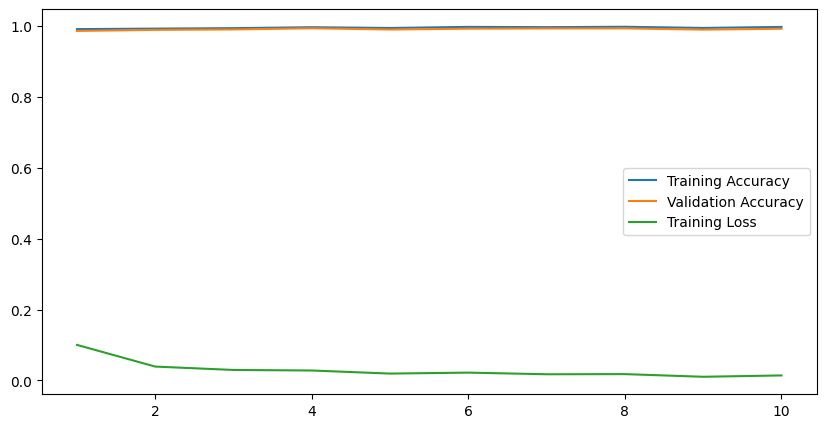

In [20]:
def pre_trained_model():
    base_model = models.resnet18(pretrained=True)
    
    # Modify the input layer to accept a single channel input (1, 224, 224)
    base_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    
    base_model.fc = nn.Sequential(
        nn.Linear(512, 256),  
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(256, 64),
        nn.ReLU(),
        nn.Linear(64, 10),  
        nn.LogSoftmax(dim=1)
    )
    
    if torch.cuda.is_available():
        base_model = base_model.to('cuda')
    
    return base_model


resnet18_model = pre_trained_model()
criterion = funct_criterion()
optimizer = funct_optimizer(resnet18_model, alpha = 0.001)


num_of_iterations = 10
train_function(resnet18_model, train_loader, valid_loader)

## Saving Models

In [21]:
torch.save(resnet18_model, './resnet18.pt') 
 